# EDA Project aprender Argentina

[Referencia Bases de microdatos Aprender 2016](https://www.argentina.gob.ar/educacion/aprender2016/bases-de-microdatos)

## Imports 

In [1]:
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

import os, re

In [2]:
pandas.set_option('display.max_columns',None)
pandas.set_option('display.max_colwidth',100)

## Set constants

In [4]:
PATH_RAW = '../data/raw/'

In [5]:
files = []
#Read all files at PATH_RAW and filter only .sav file
for path in os.listdir(PATH_RAW):
     for file in os.listdir(PATH_RAW+f'{path}/'):
        if '.csv' in file:
            files.append(PATH_RAW+f'{path}/'+f'{file}')

In [6]:
files

['../data/raw/2017/Estudiante_5-6 año Secundaria 2017.csv',
 '../data/raw/2017/Estudiante_6 grado Primaria 2017.csv',
 '../data/raw/2018/Estudiante_6 grado Primaria 2018.csv',
 '../data/raw/2016/Estudiante_5-6 año Secundaria 2016.csv',
 '../data/raw/2016/Estudiante_6 grado Primaria 2016.csv']

In [7]:
year = '2016'
print("Reading CSV:")
for file in files:
    if year in file:
        name_dataframe = '_'.join(file.split('/')[-1].split(' ')).replace('-','_').replace('.csv','')
        print('    * ',name_dataframe)
        exec(f'{name_dataframe} = pandas.read_csv("{file}")')

Reading CSV:
    *  Estudiante_5_6_año_Secundaria_2016


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


    *  Estudiante_6_grado_Primaria_2016


In [8]:
dict_2016 = pandas.read_excel('../data/processed/dicts/aprender2016-diccionario-secundaria-12.xlsx')
dict_2016 = dict_2016.fillna(method='ffill')

In [15]:
len(Estudiante_6_grado_Primaria_2016.columns)

123

In [22]:
dict_2016.head(12)

,Variable,Etiqueta,Códigos,Etiqueta.1
0,Ap1,¿Cuántos años tenés?,1.0,16 años o menos
1,Ap1,¿Cuántos años tenés?,2.0,17 años
2,Ap1,¿Cuántos años tenés?,3.0,18 años
3,Ap1,¿Cuántos años tenés?,4.0,19 años
4,Ap1,¿Cuántos años tenés?,5.0,20 años o más
5,Ap1,¿Cuántos años tenés?,-1.0,En blanco
6,Ap1,¿Cuántos años tenés?,-9.0,No respondió ninguna pregunta del cuestionario complementario
7,Ap2,¿Sos varón o mujer?,1.0,Varón
8,Ap2,¿Sos varón o mujer?,2.0,Mujer
9,Ap2,¿Sos varón o mujer?,-1.0,En blanco


In [16]:
variables_explicitas =dict_2016[dict_2016.Variable.isin(Estudiante_6_grado_Primaria_2016.columns)]
variables_explicitas.head()

,Variable,Etiqueta,Códigos,Etiqueta.1
0,Ap1,¿Cuántos años tenés?,1.0,16 años o menos
1,Ap1,¿Cuántos años tenés?,2.0,17 años
2,Ap1,¿Cuántos años tenés?,3.0,18 años
3,Ap1,¿Cuántos años tenés?,4.0,19 años
4,Ap1,¿Cuántos años tenés?,5.0,20 años o más


In [17]:
len(variables_explicitas.Variable.unique())

62

In [11]:
variables_explicitas.Variable.unique()

array(['Ap1', 'Ap2', 'Ap4', 'Ap5', 'Ap6', 'Ap7', 'Ap8', 'Ap11', 'Ap12',
       'Ap13', 'Ap14', 'Ap19', 'Ap20', 'Ap22a', 'Ap22b', 'Ap22c', 'Ap22d',
       'Ap25a', 'Ap25b', 'Ap25c', 'Ap27a', 'Ap27b', 'Ap27c', 'Ap29',
       'Ap30', 'Ap31a', 'Ap31b', 'Ap31c', 'Ap31d', 'Ap31e', 'Ap31f',
       'Ap32a', 'Ap32b', 'Ap32c', 'Ap32d', 'Ap34a', 'Ap34b', 'Ap34c',
       'Ap34d', 'Ap34e', 'Ap34f', 'Ap34g', 'Ap36a', 'Ap36b', 'ponder',
       'cod_provincia', 'lpondera', 'lpuntaje', 'ldesemp', 'mpondera',
       'mpuntaje', 'mdesemp', 'sector', 'ambito', 'iclima',
       'autoconlengua', 'autoconmate', 'qvulneraa', 'qvulneraap',
       'isocioa', 'isocioal', 'isocioam'], dtype=object)

In [12]:
print('Etiquetas explicitas que tenemos en el dataset:')
for label in list(variables_explicitas.Etiqueta.unique()):
    print('    *  ',label)

Etiquetas explicitas que tenemos en el dataset:
    *   ¿Cuántos años tenés?
    *   ¿Sos varón o mujer?
    *   ¿Cuántas personas viven en tu casa de manera permanente, incluyéndote a vos?
    *   ¿Cuántas habitaciones tiene la casa en la que vivís, sin contar la cocina y el baño?
    *   ¿Alguien de tu familia recibe la Asignación Universal por Hijo u otro programa social?
    *   ¿Cuál es el nivel educativo de tu mamá?
    *   ¿Cuál es el nivel educativo de tu papá?
    *   ¿La semana pasada, además de asistir a la escuela, trabajaste fuera de tu casa?
    *   ¿Tenés hijos?
    *   ¿Estás embarazada?
    *   ¿Fuiste al jardín de infantes?
    *   ¿Cuántas veces faltaste a lo largo de este año?
    *   ¿Durante este año fuiste a clases de apoyo?
    *   ¿Qué es lo que te resulta más difícil en la escuela? Prestar atención en clase
    *   ¿Qué es lo que te resulta más difícil en la escuela? Entender las materias
    *   ¿Qué es lo que te resulta más difícil en la escuela? Tomar apunt

In [19]:
def plot_multiple_vars(df,x,y,title='Titulo de referencia',label= False):
    
    data =df[y].value_counts().to_frame().reset_index().sort_values(y)
    
    if list(label):
        label = label[label.Variable==y].set_index('Códigos')
        data['index'] =data['index'].map(label['Etiqueta.1']) 
        
    plt.figure(figsize=(20,10))
    
    sns.set(style="whitegrid")
    ax = sns.barplot(data = data , 
                     x =x,y=y,order = data['index']
                    )



    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
    if list(label):
        ax.set(xlabel= label['Etiqueta'].unique().item(), ylabel='Count')
    else:
        ax.set(xlabel= y, ylabel='Count')
    # add proper Dim values as x labels
    for item in ax.get_xticklabels(): item.set_rotation(90)
    for i, v in enumerate(data[y].iteritems()):        
        ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
    plt.tight_layout()
    plt.title(title,size =20)
    return plt.show()

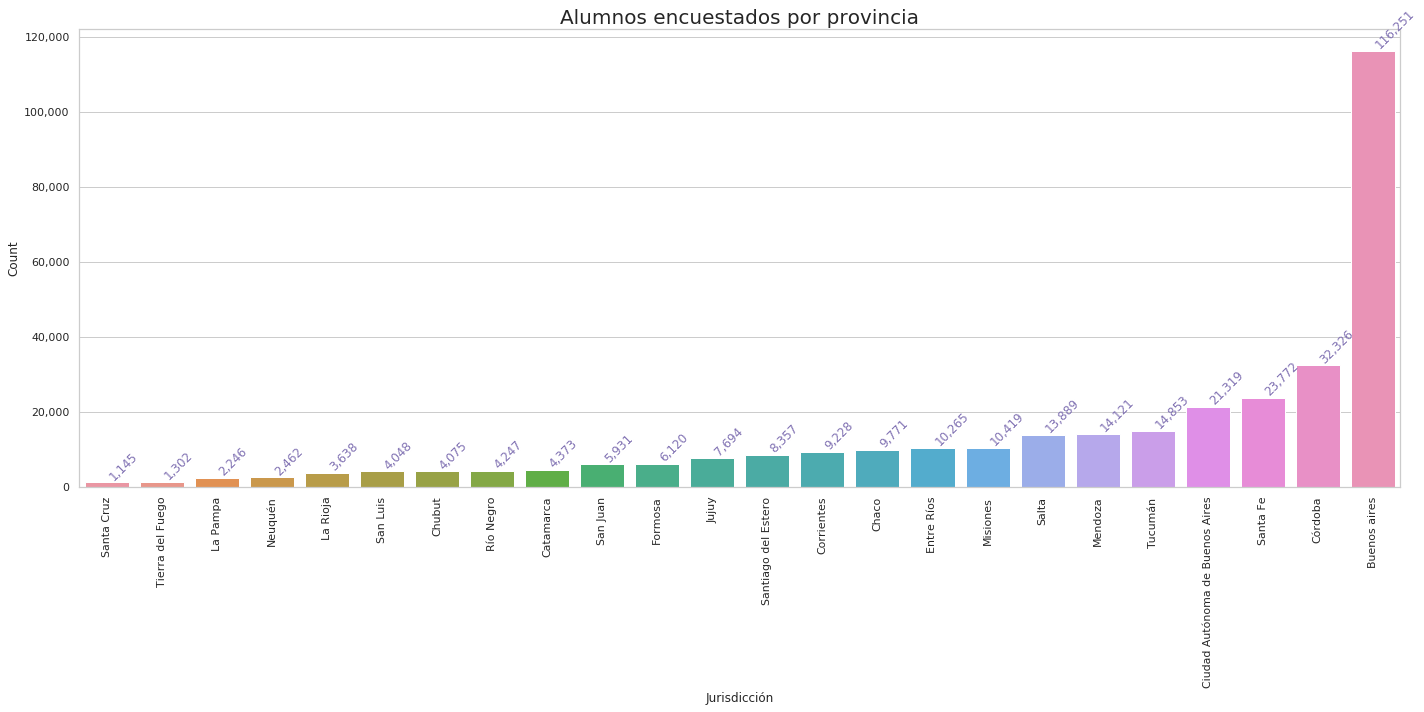

In [14]:
plot_multiple_vars(df = Estudiante_5_6_año_Secundaria_2016, x ='index',y='cod_provincia',title='Alumnos encuestados por provincia',label = dict_2016)

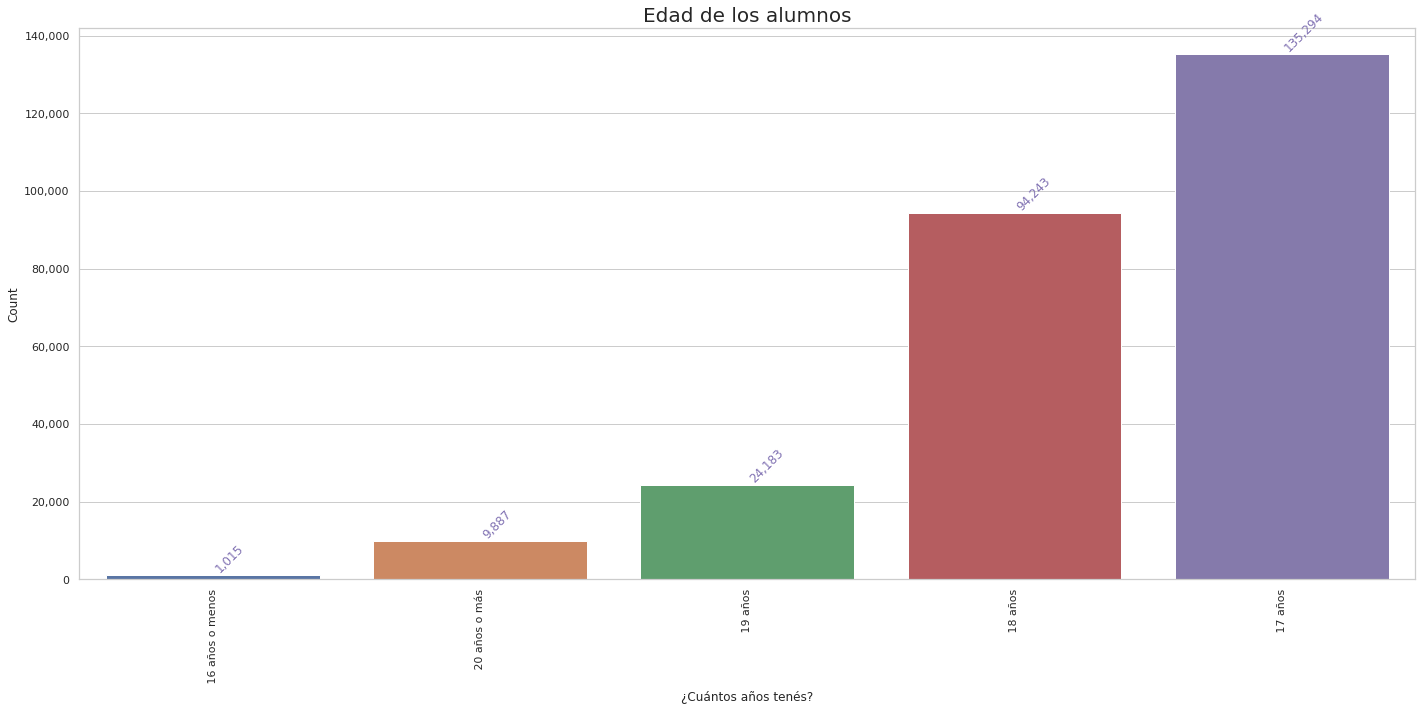

In [15]:
plot_multiple_vars(df = Estudiante_5_6_año_Secundaria_2016, x ='index',y='Ap1',title='Edad de los alumnos',label = dict_2016)

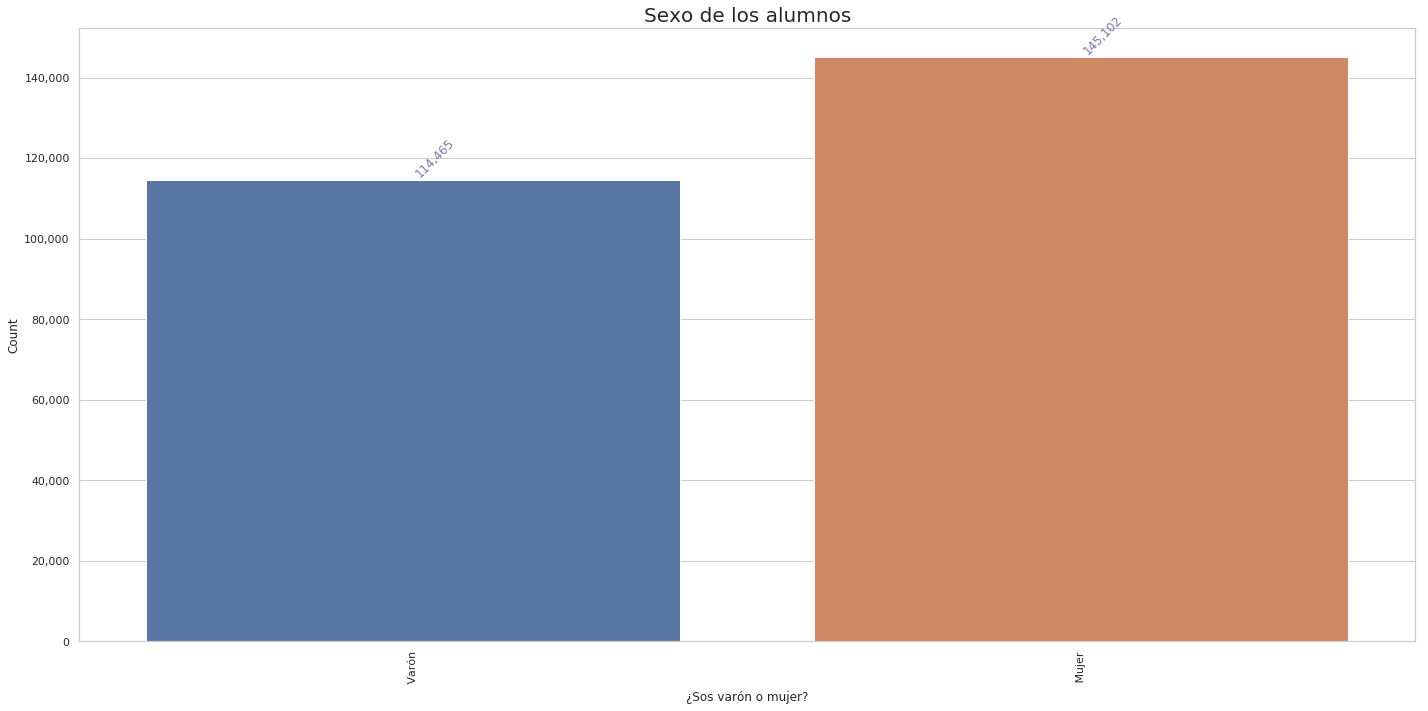

In [16]:
plot_multiple_vars(df = Estudiante_5_6_año_Secundaria_2016, x ='index',y='Ap2',title='Sexo de los alumnos',label = dict_2016)

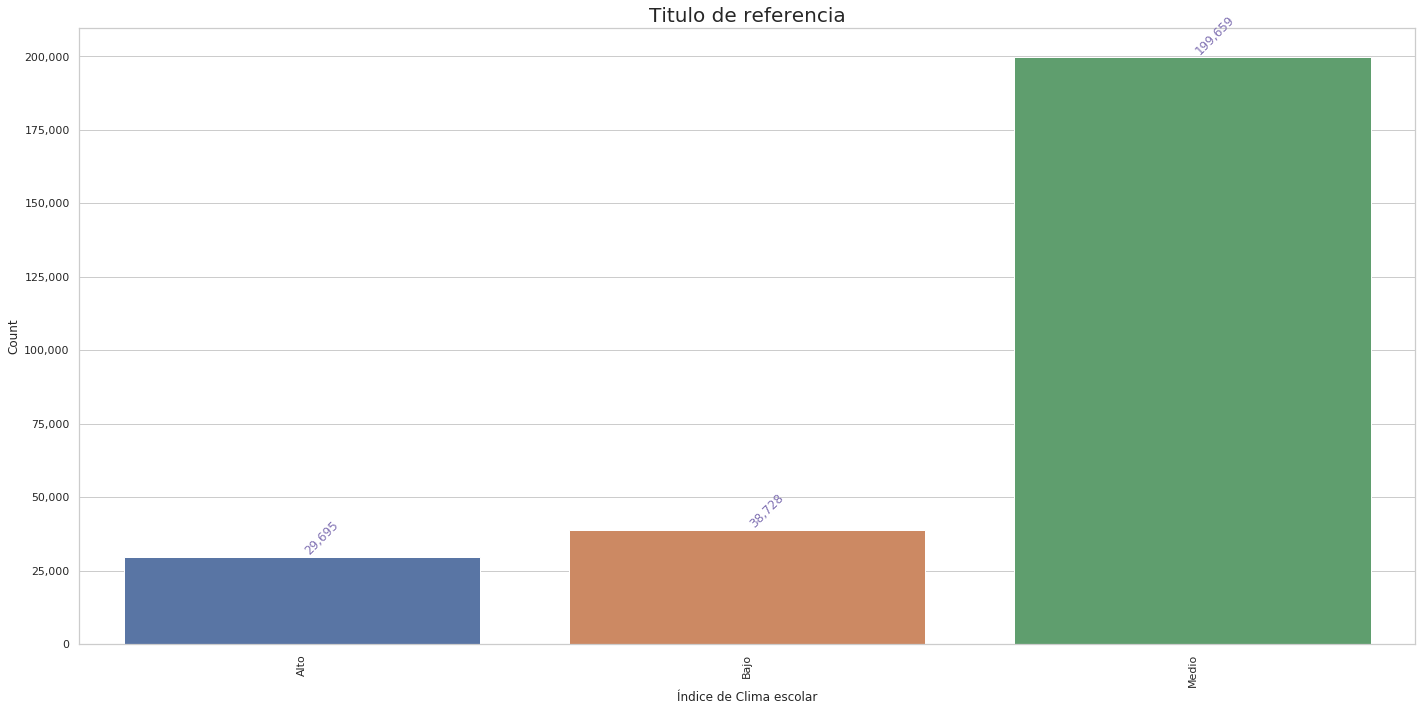

In [17]:
plot_multiple_vars(df = Estudiante_5_6_año_Secundaria_2016, x ='index',y='iclima',label = dict_2016)iiiiiii

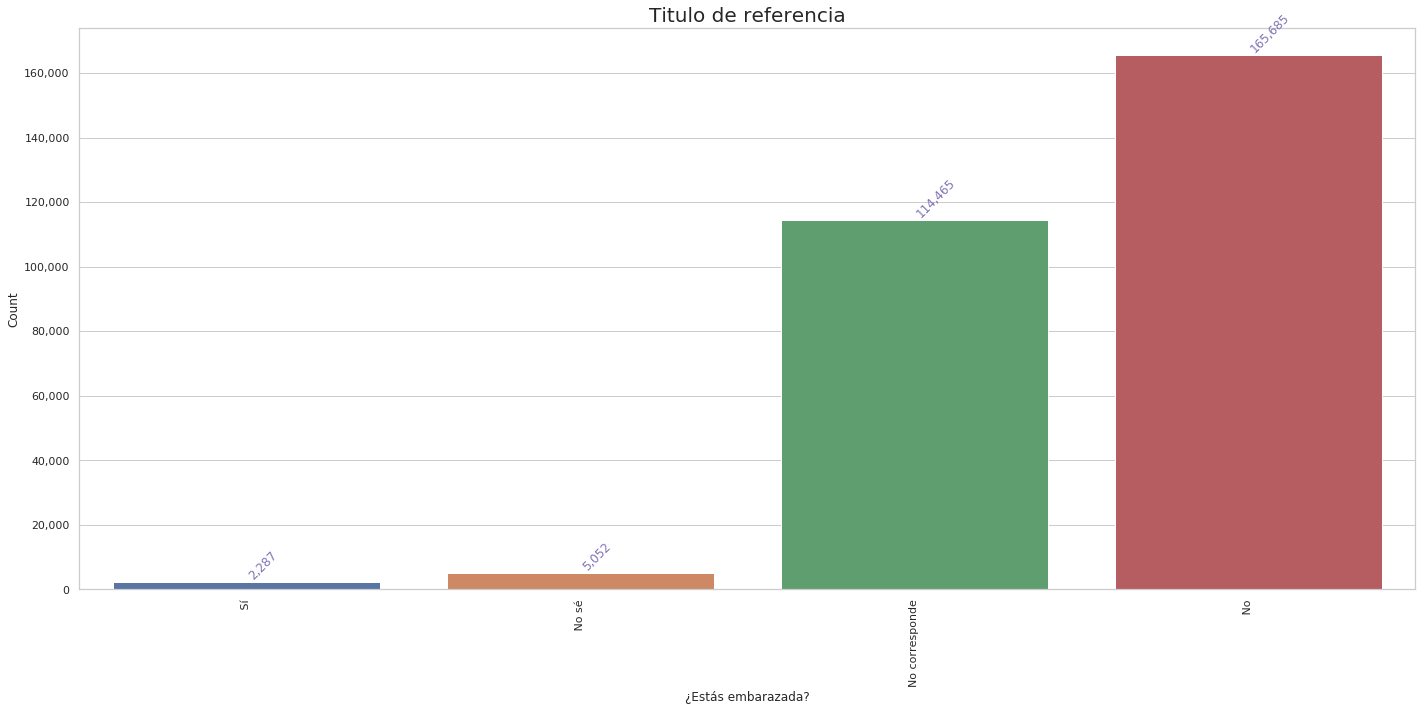

In [18]:
plot_multiple_vars(df = Estudiante_5_6_año_Secundaria_2016, x ='index',y='Ap13',label = dict_2016)

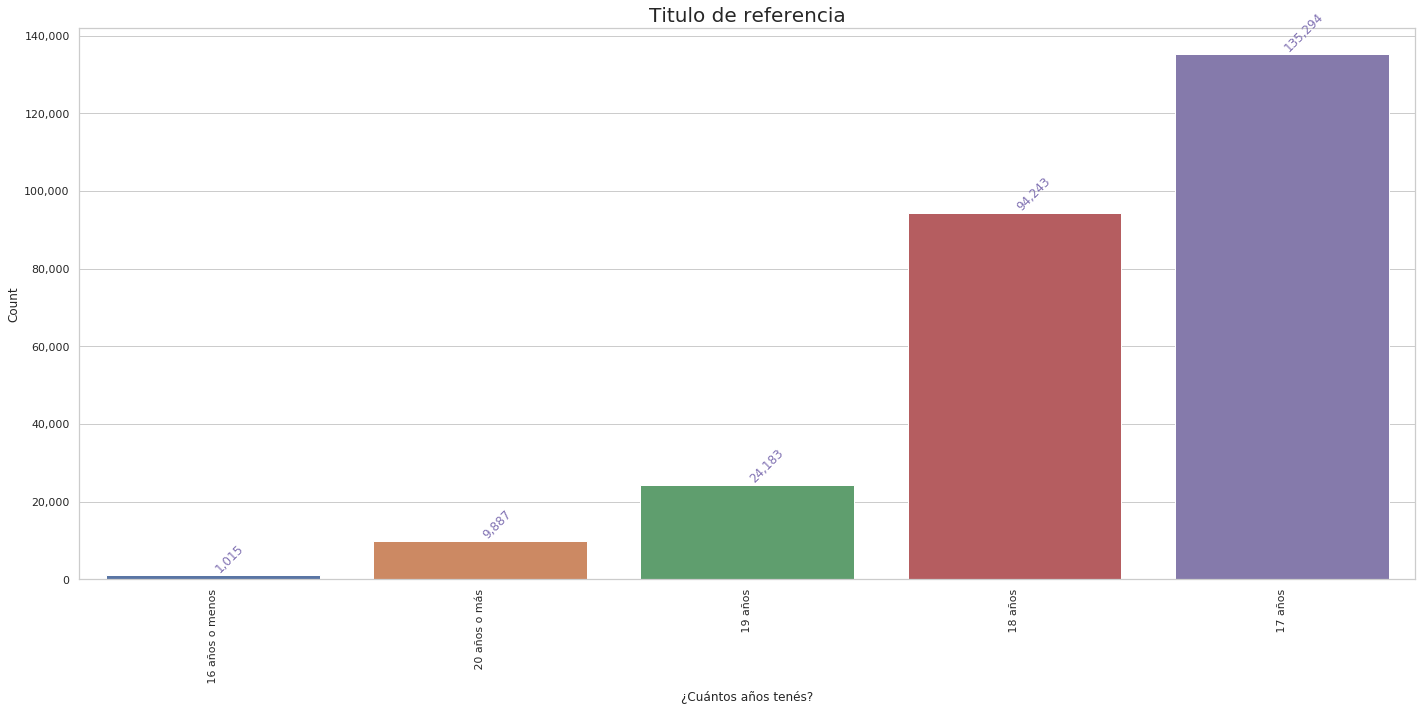

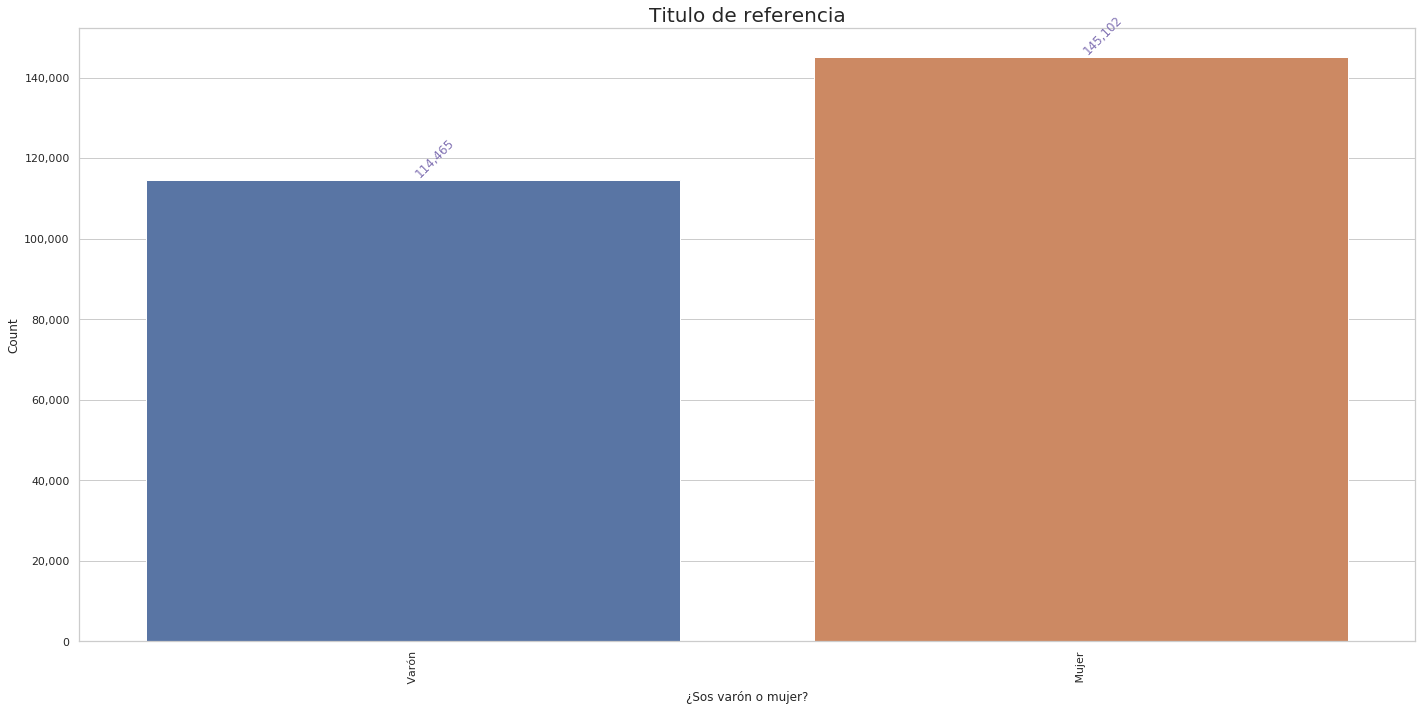

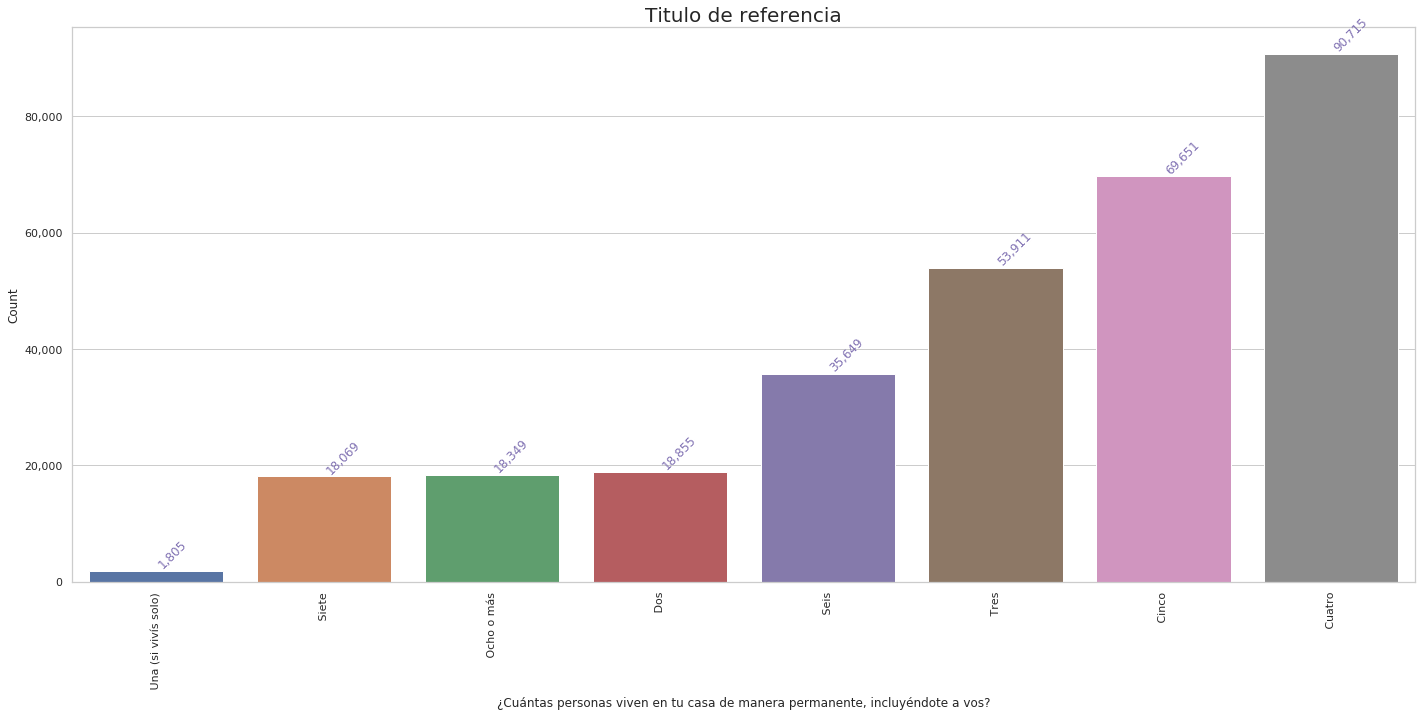

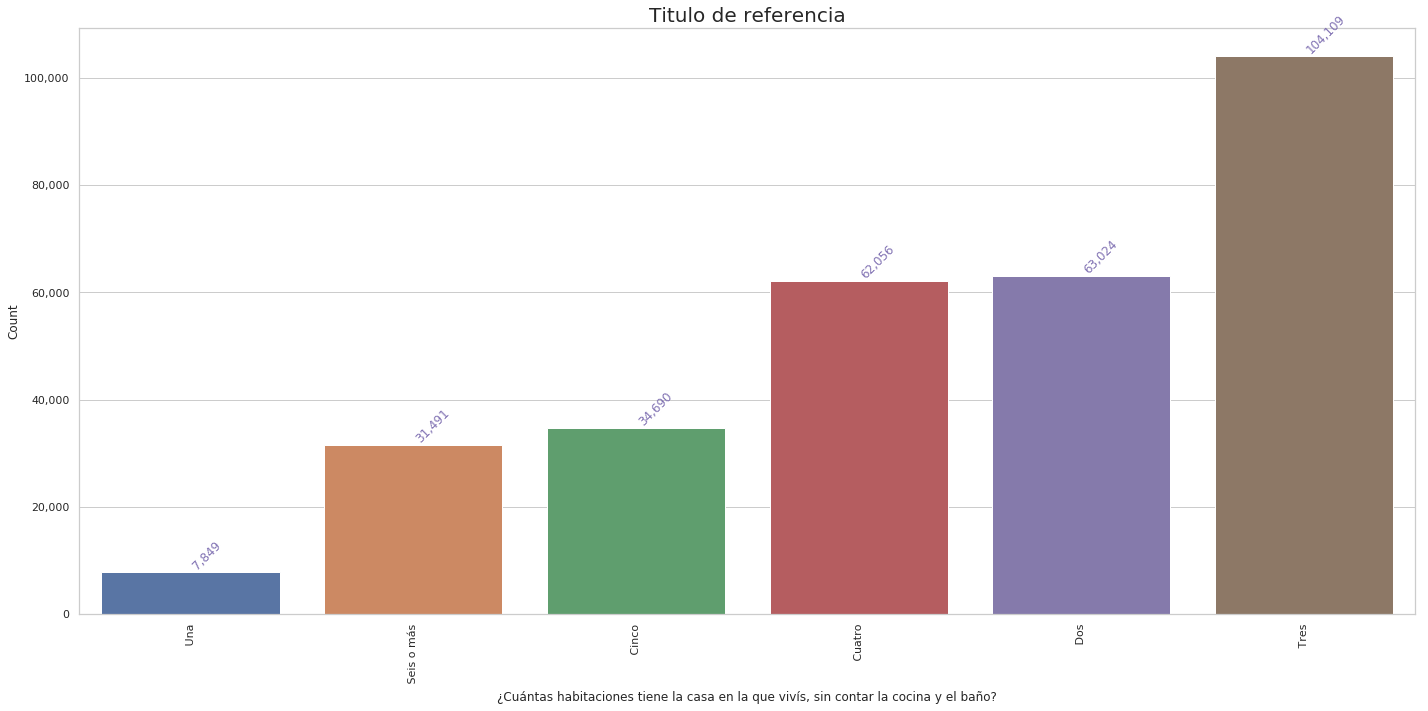

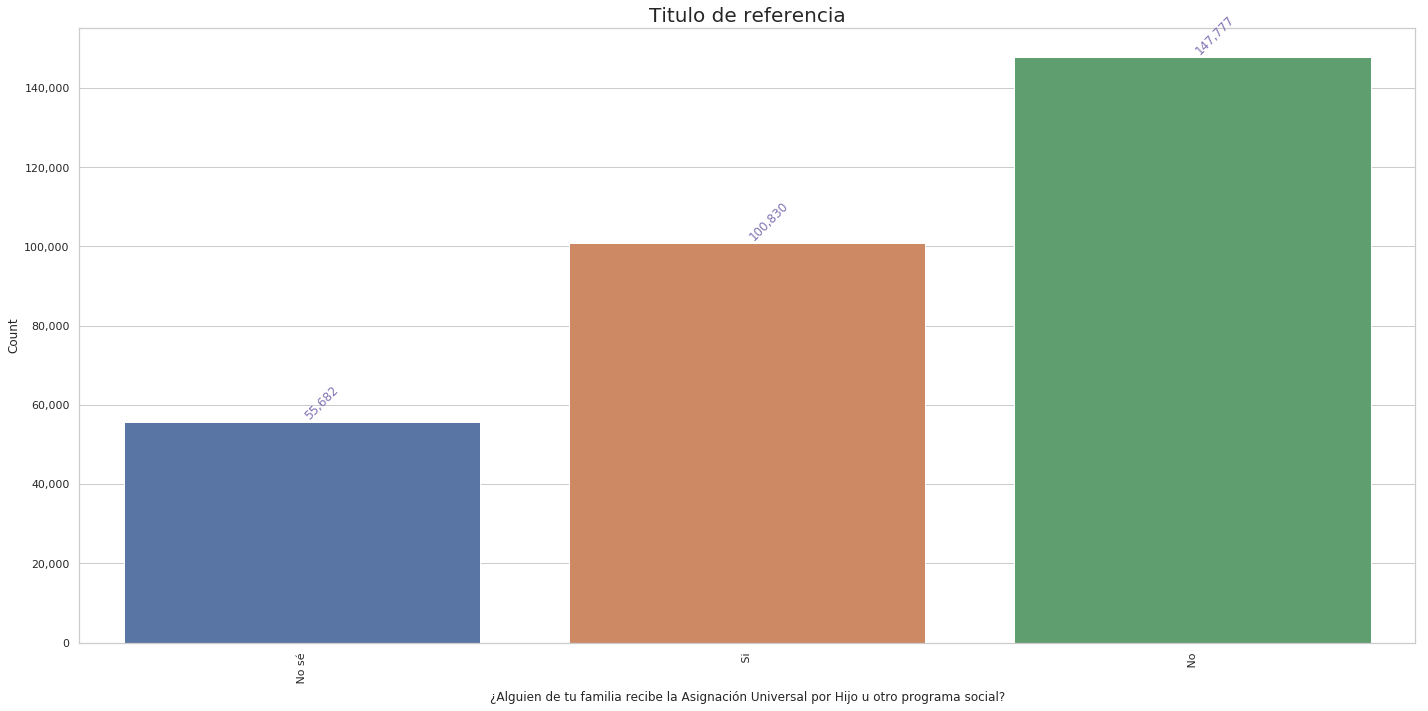

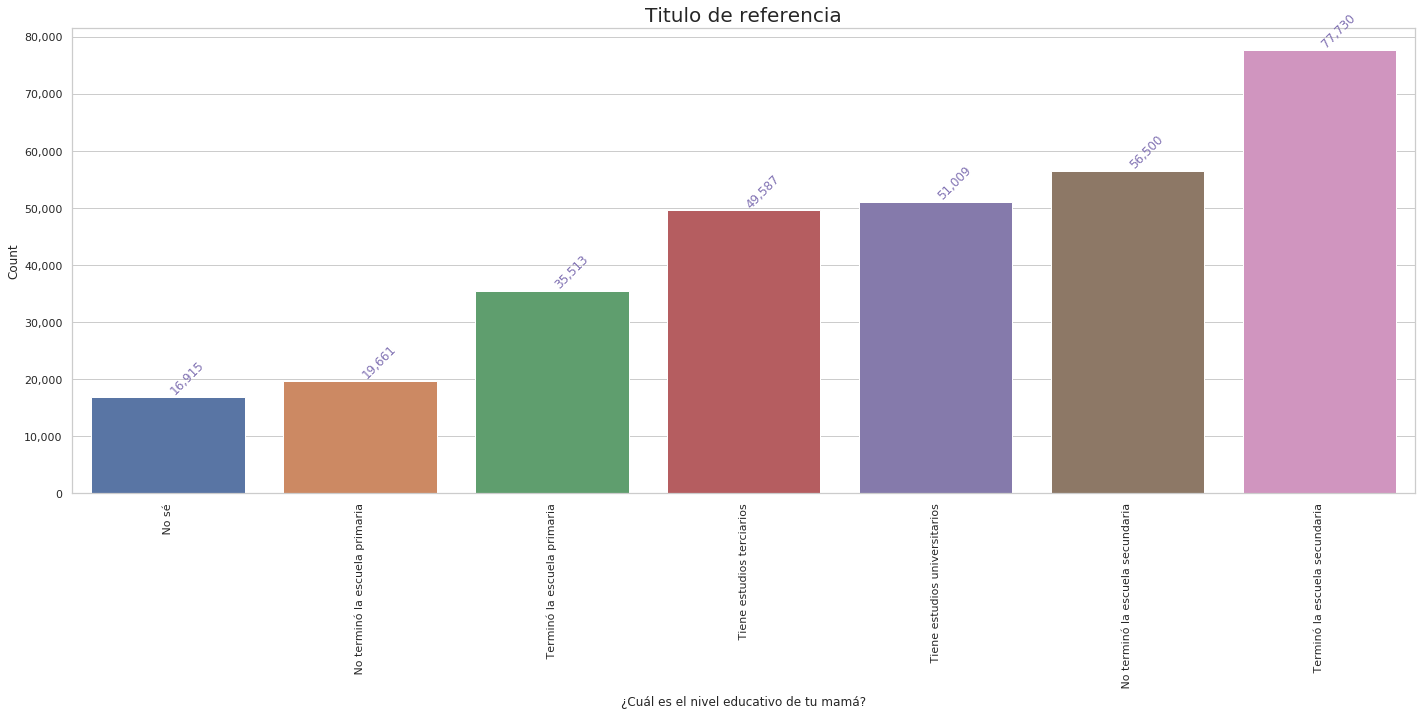

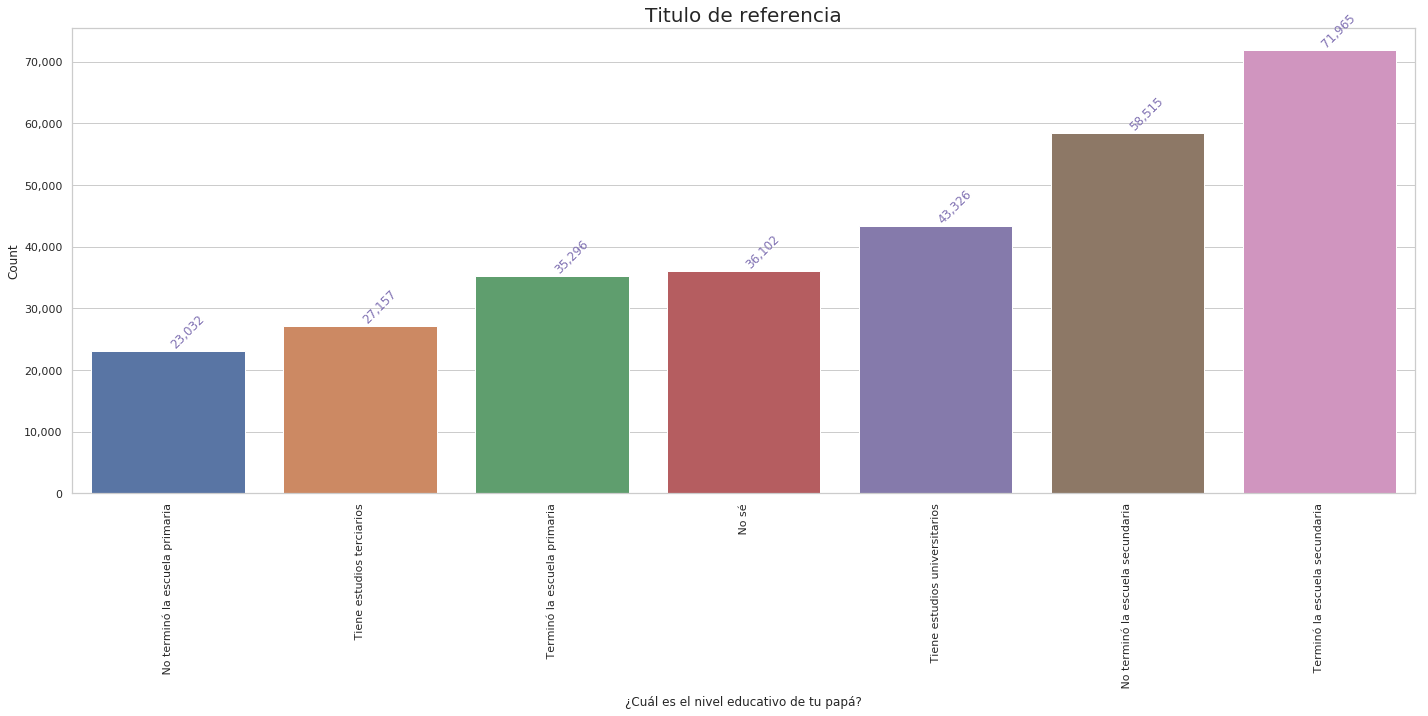

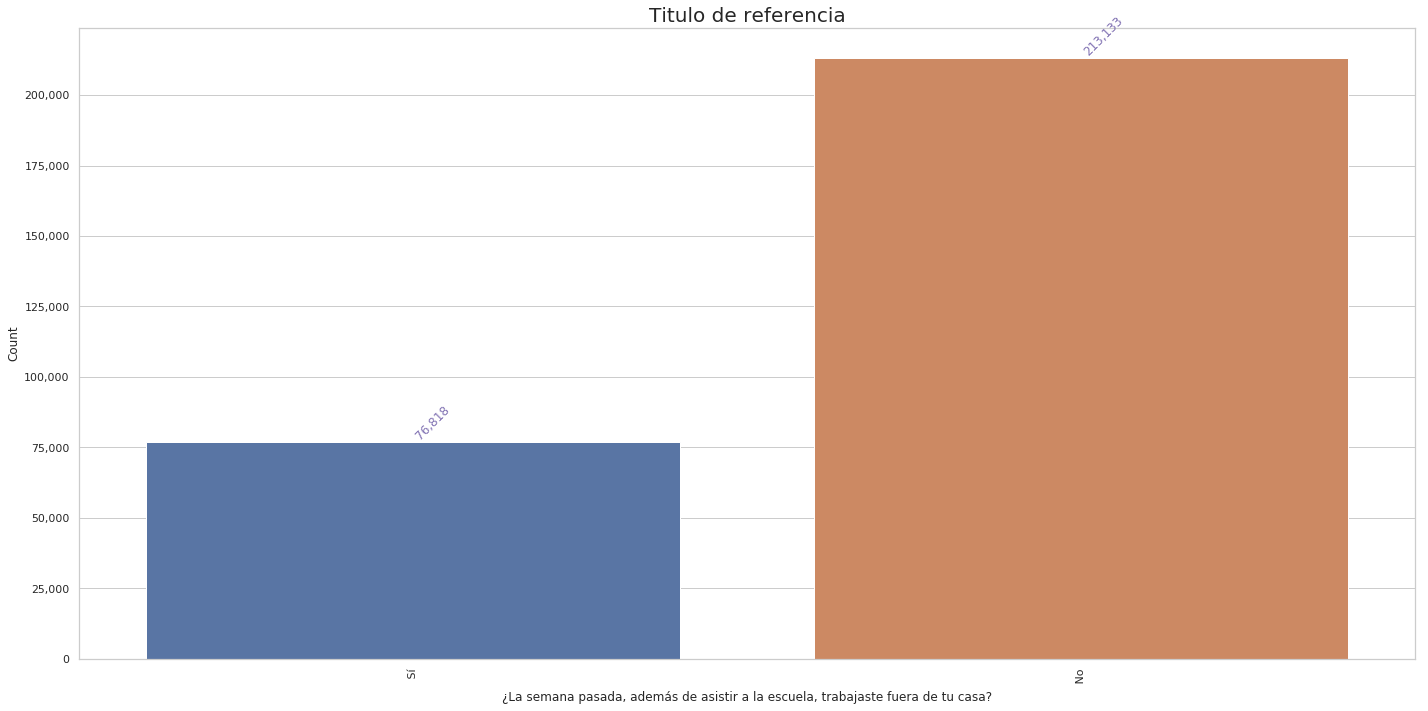

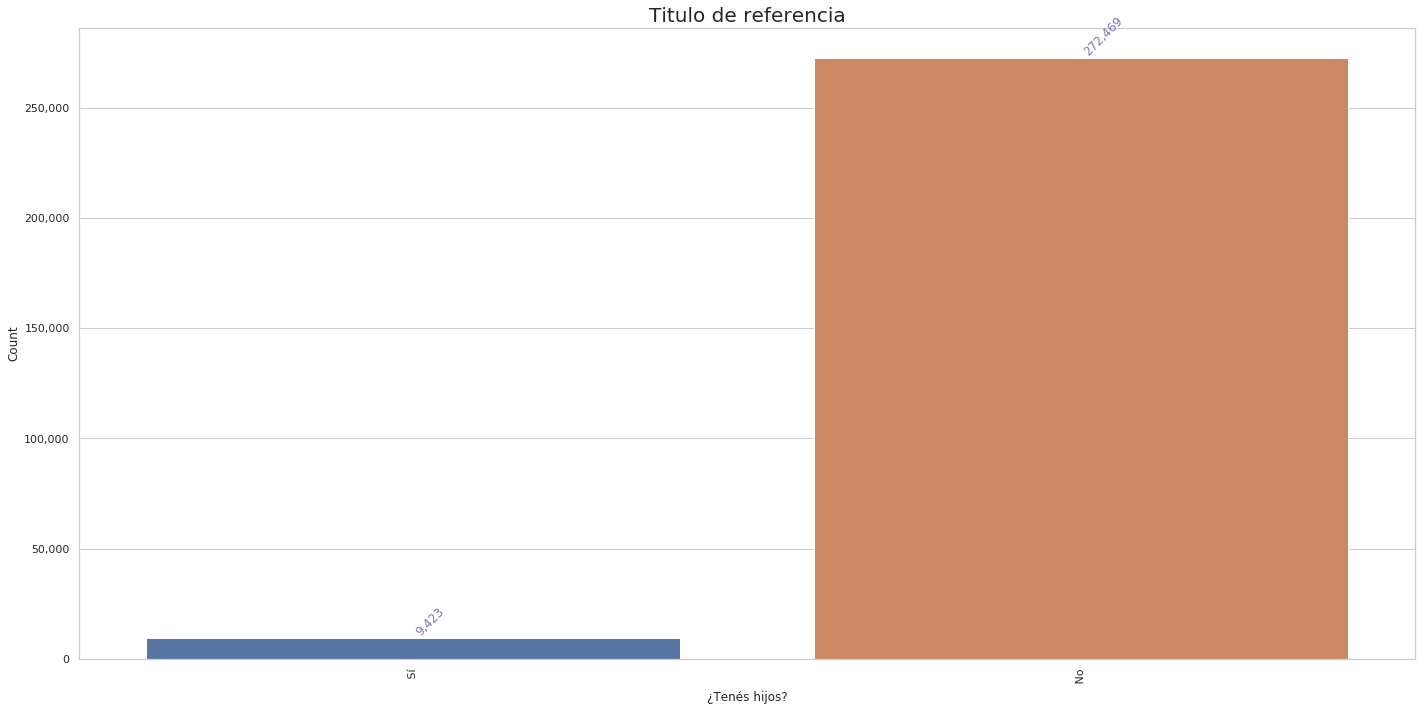

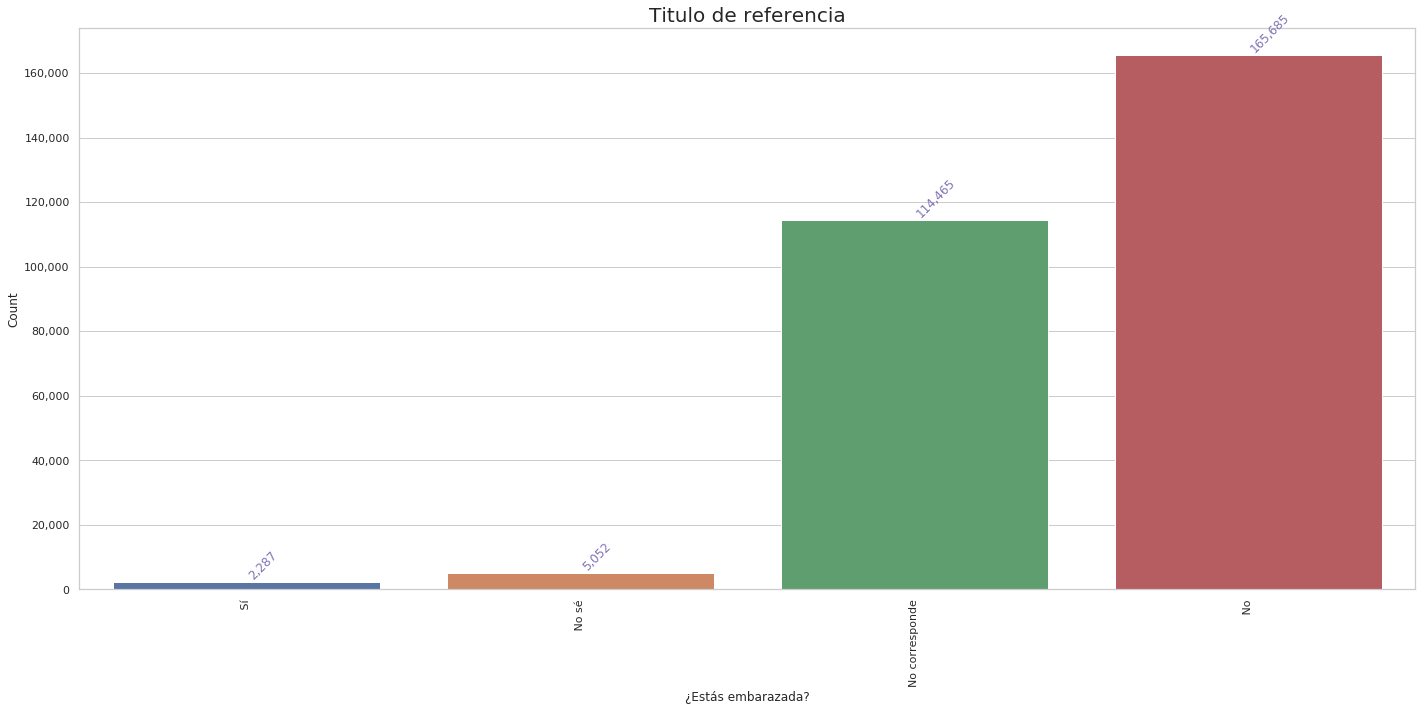

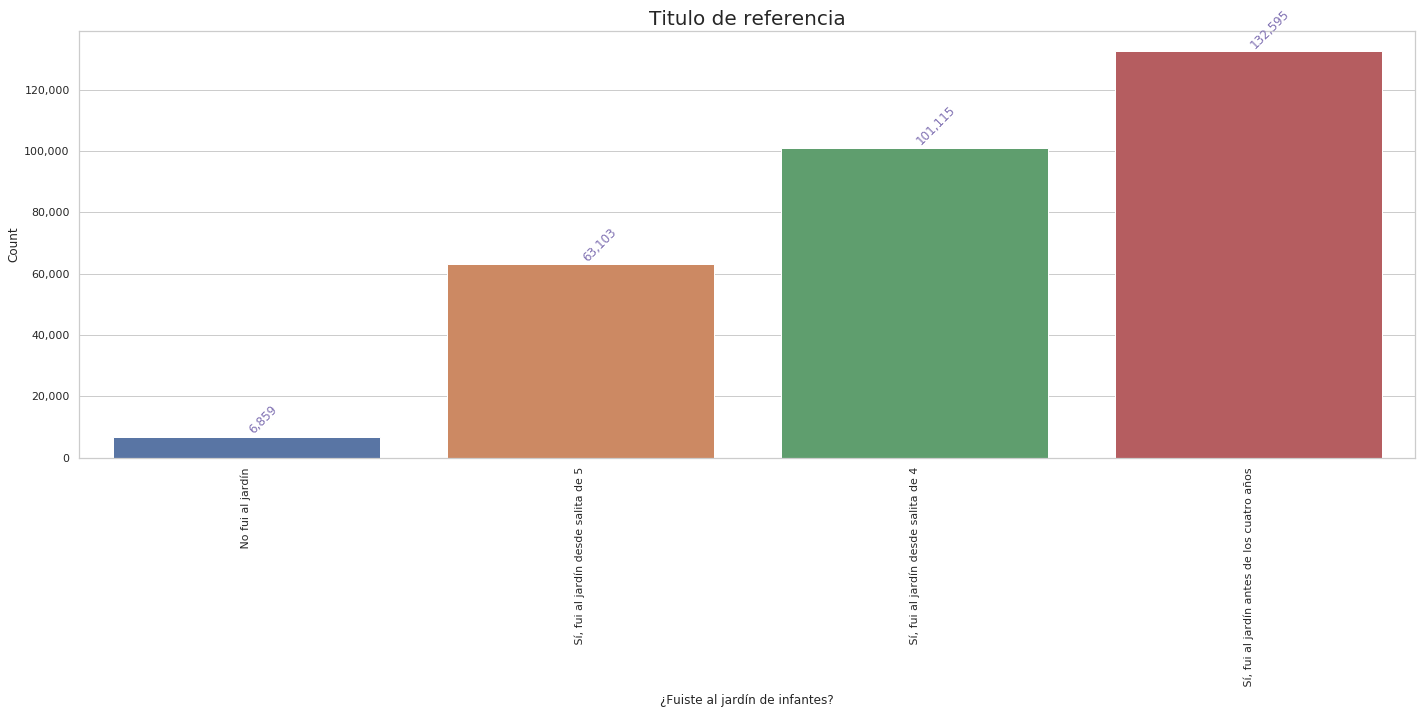

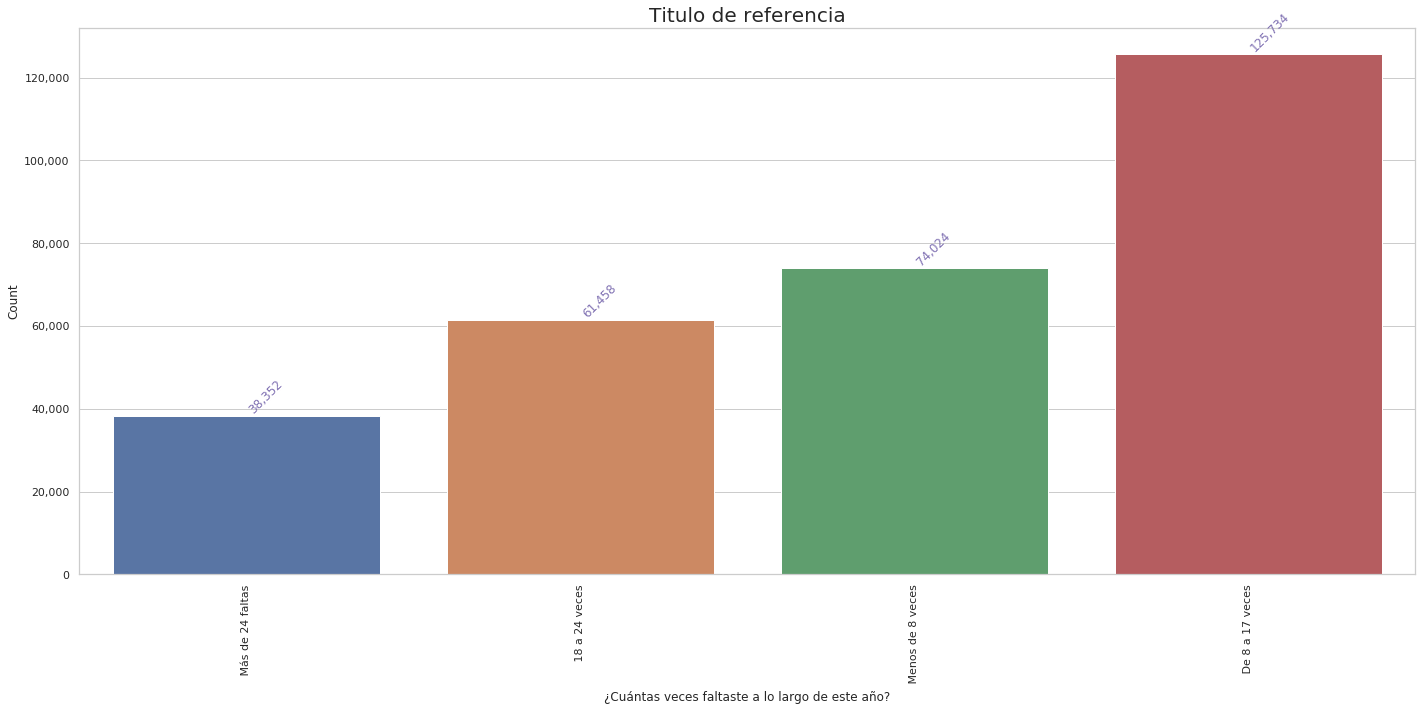

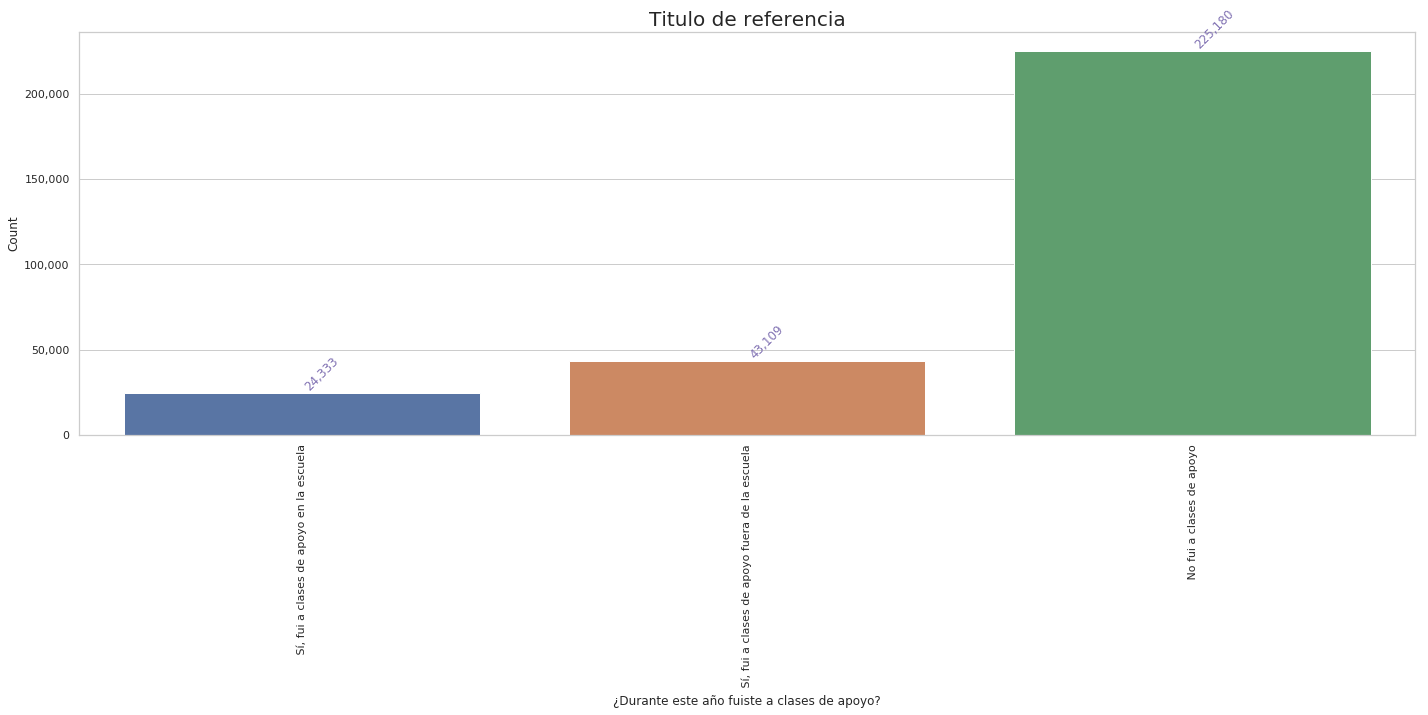

/opt/conda/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


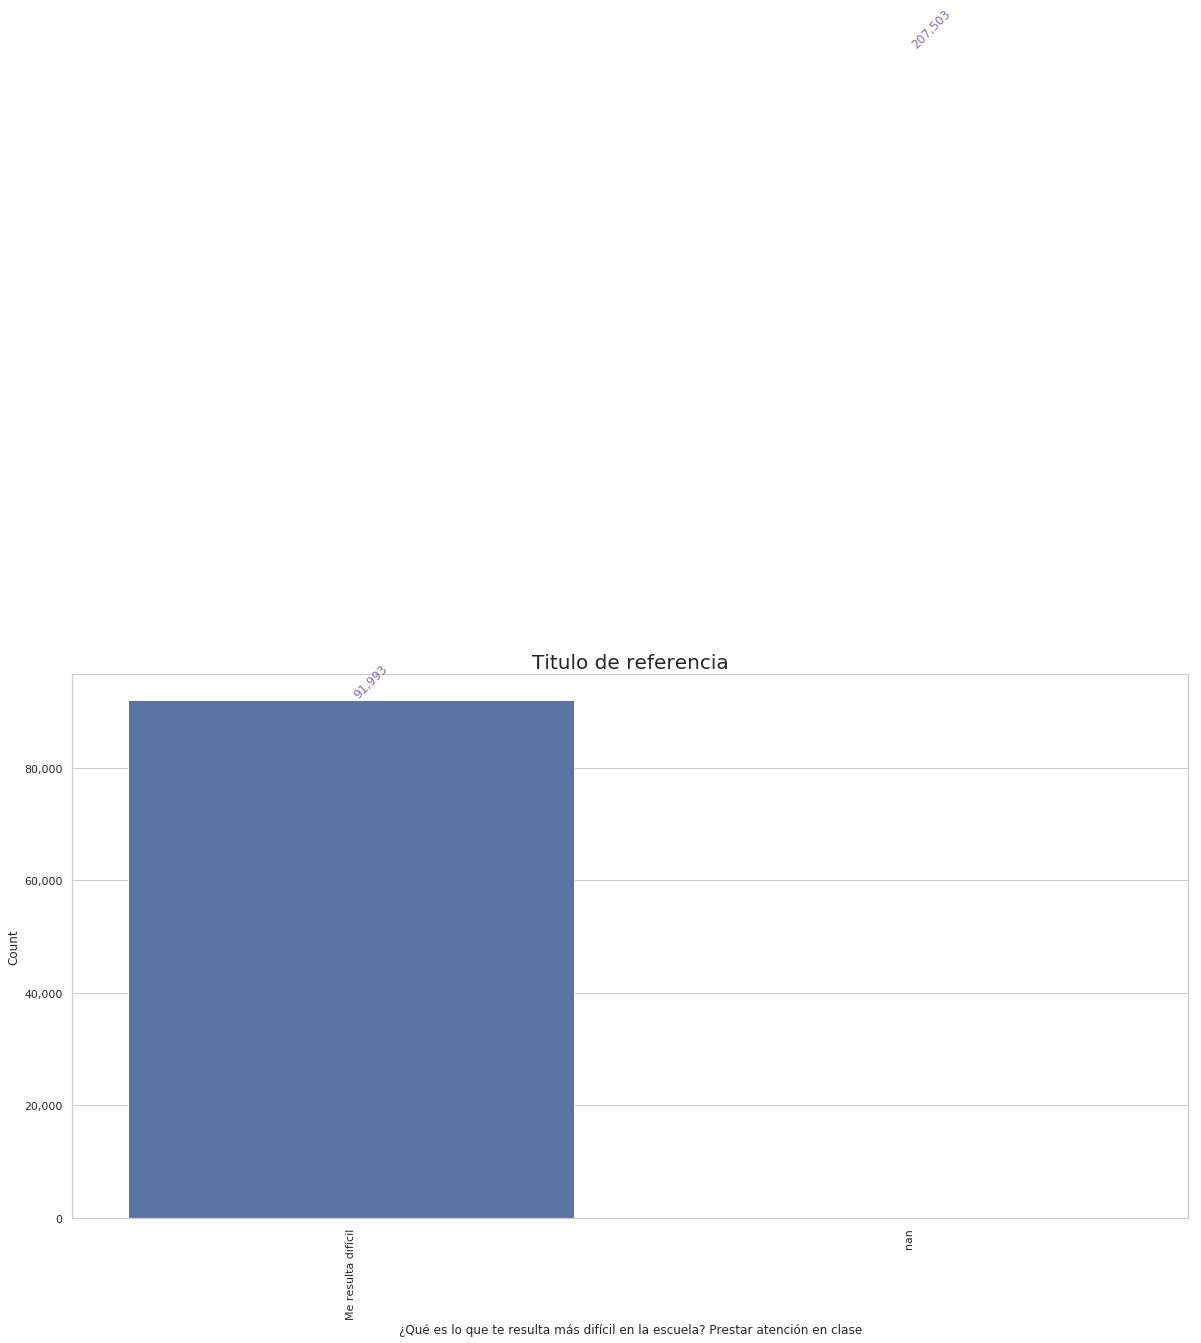

/opt/conda/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


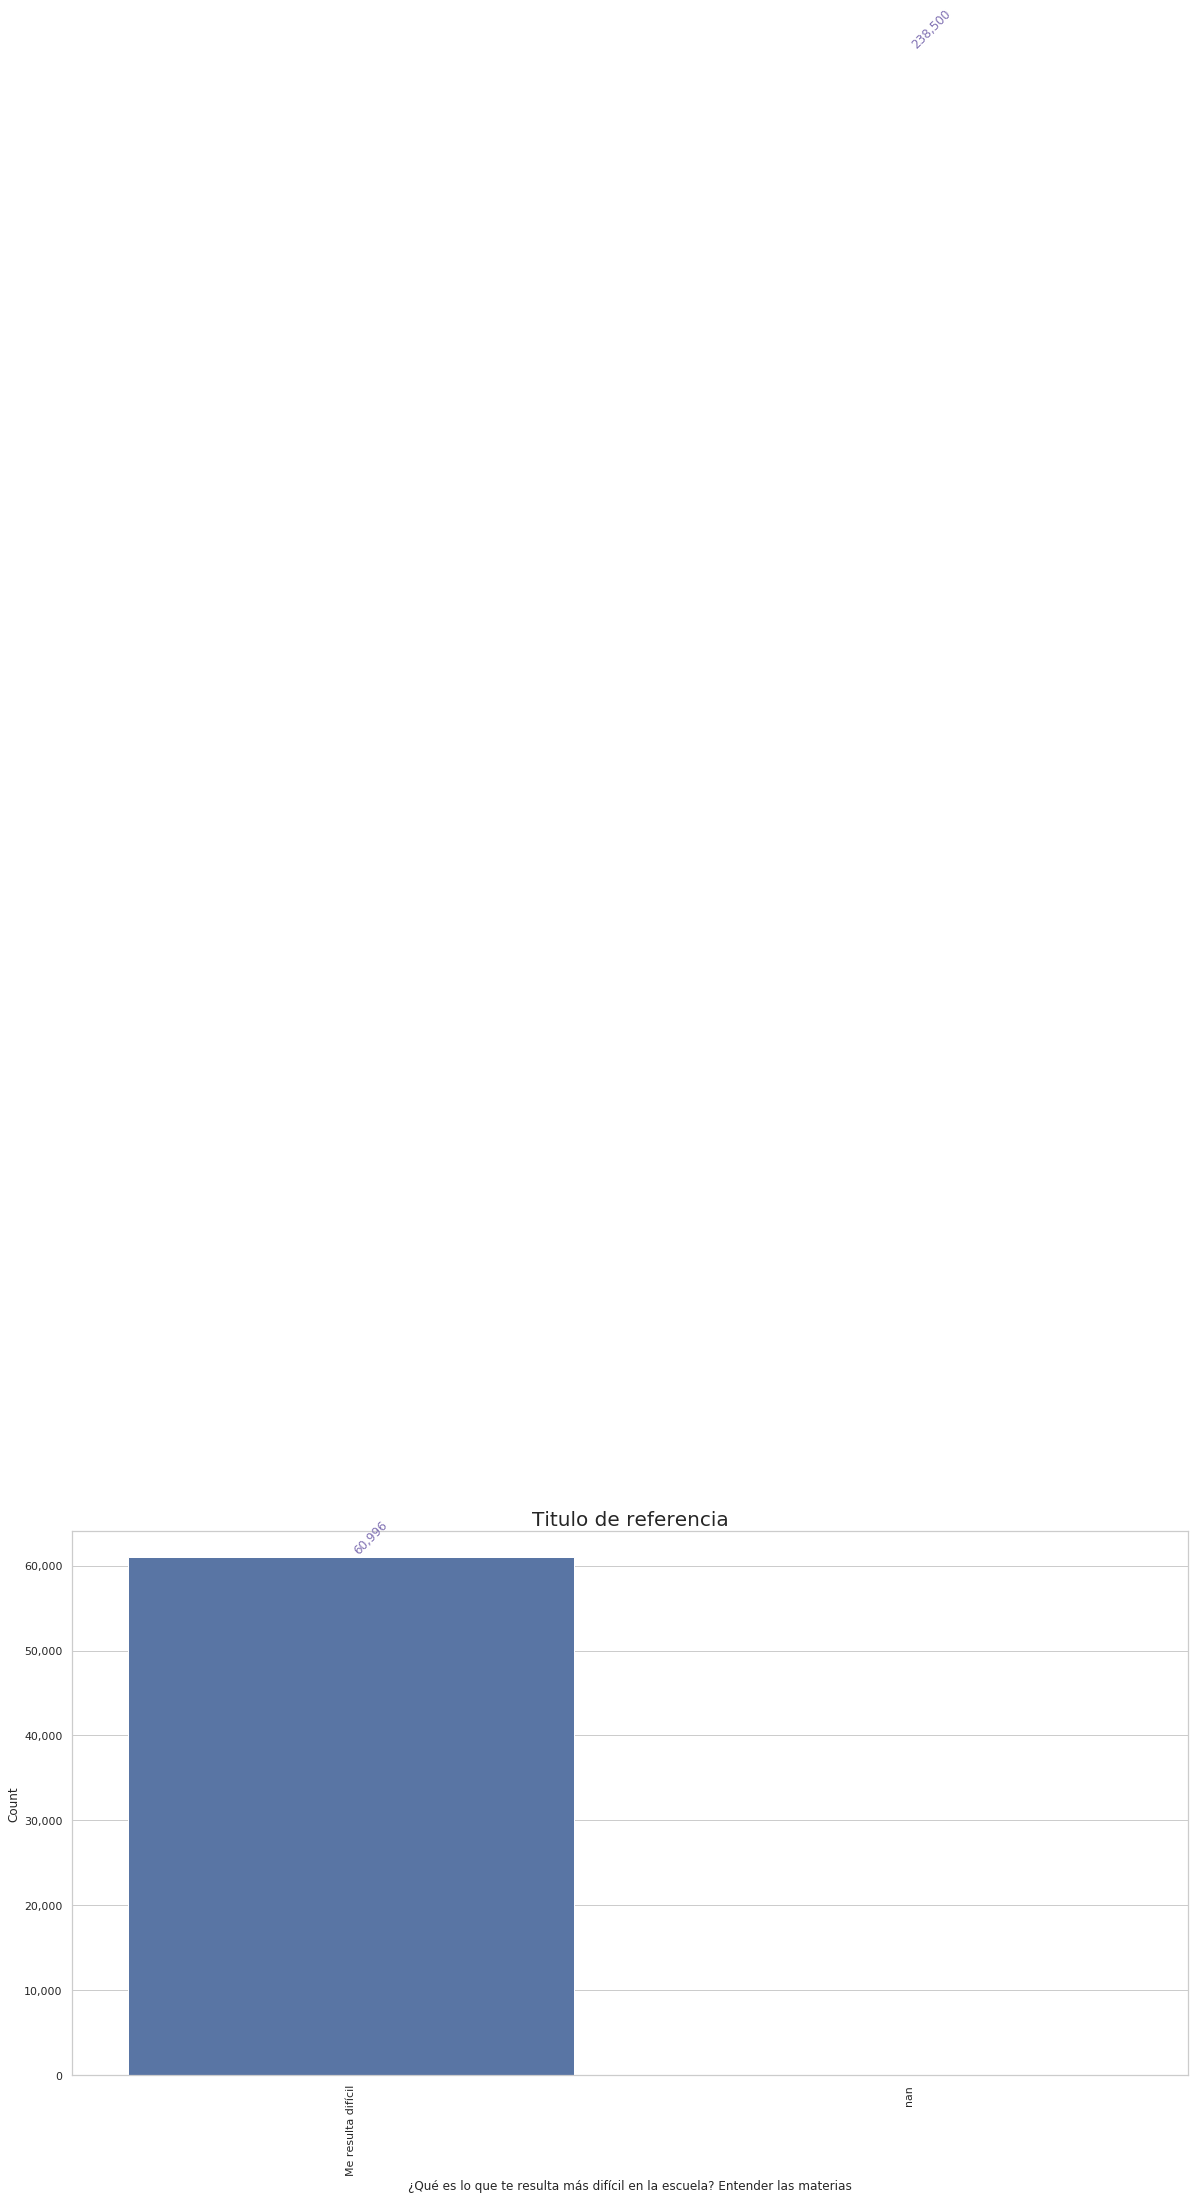

/opt/conda/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


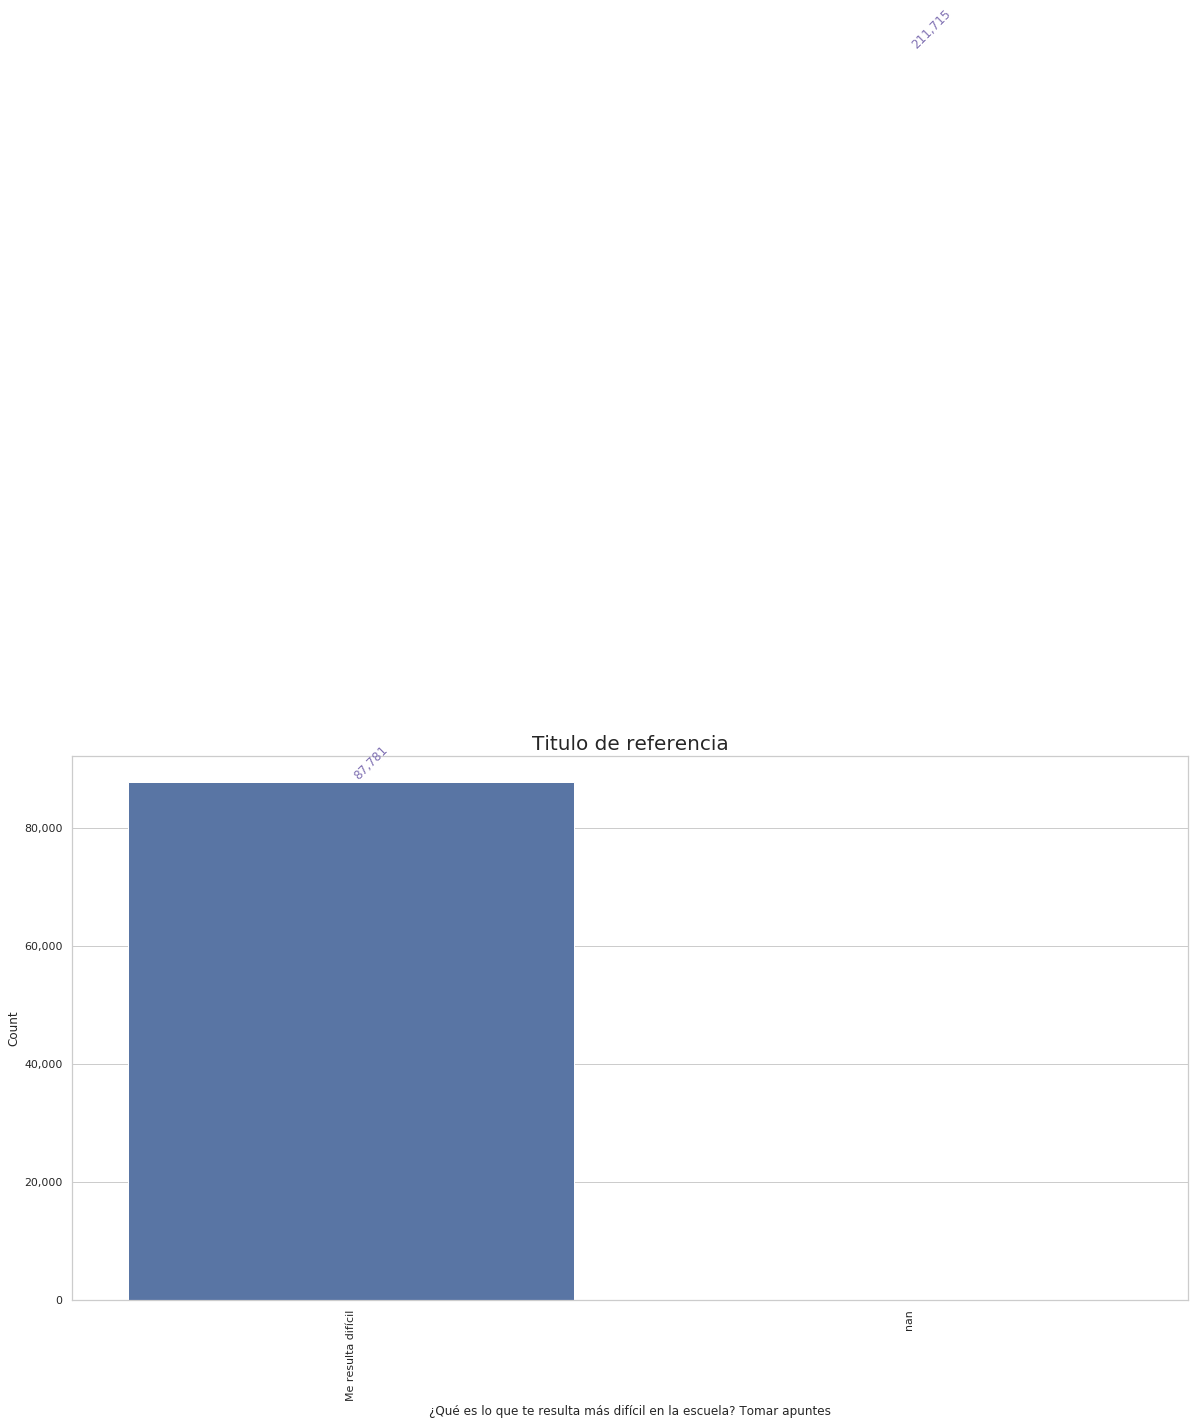

/opt/conda/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


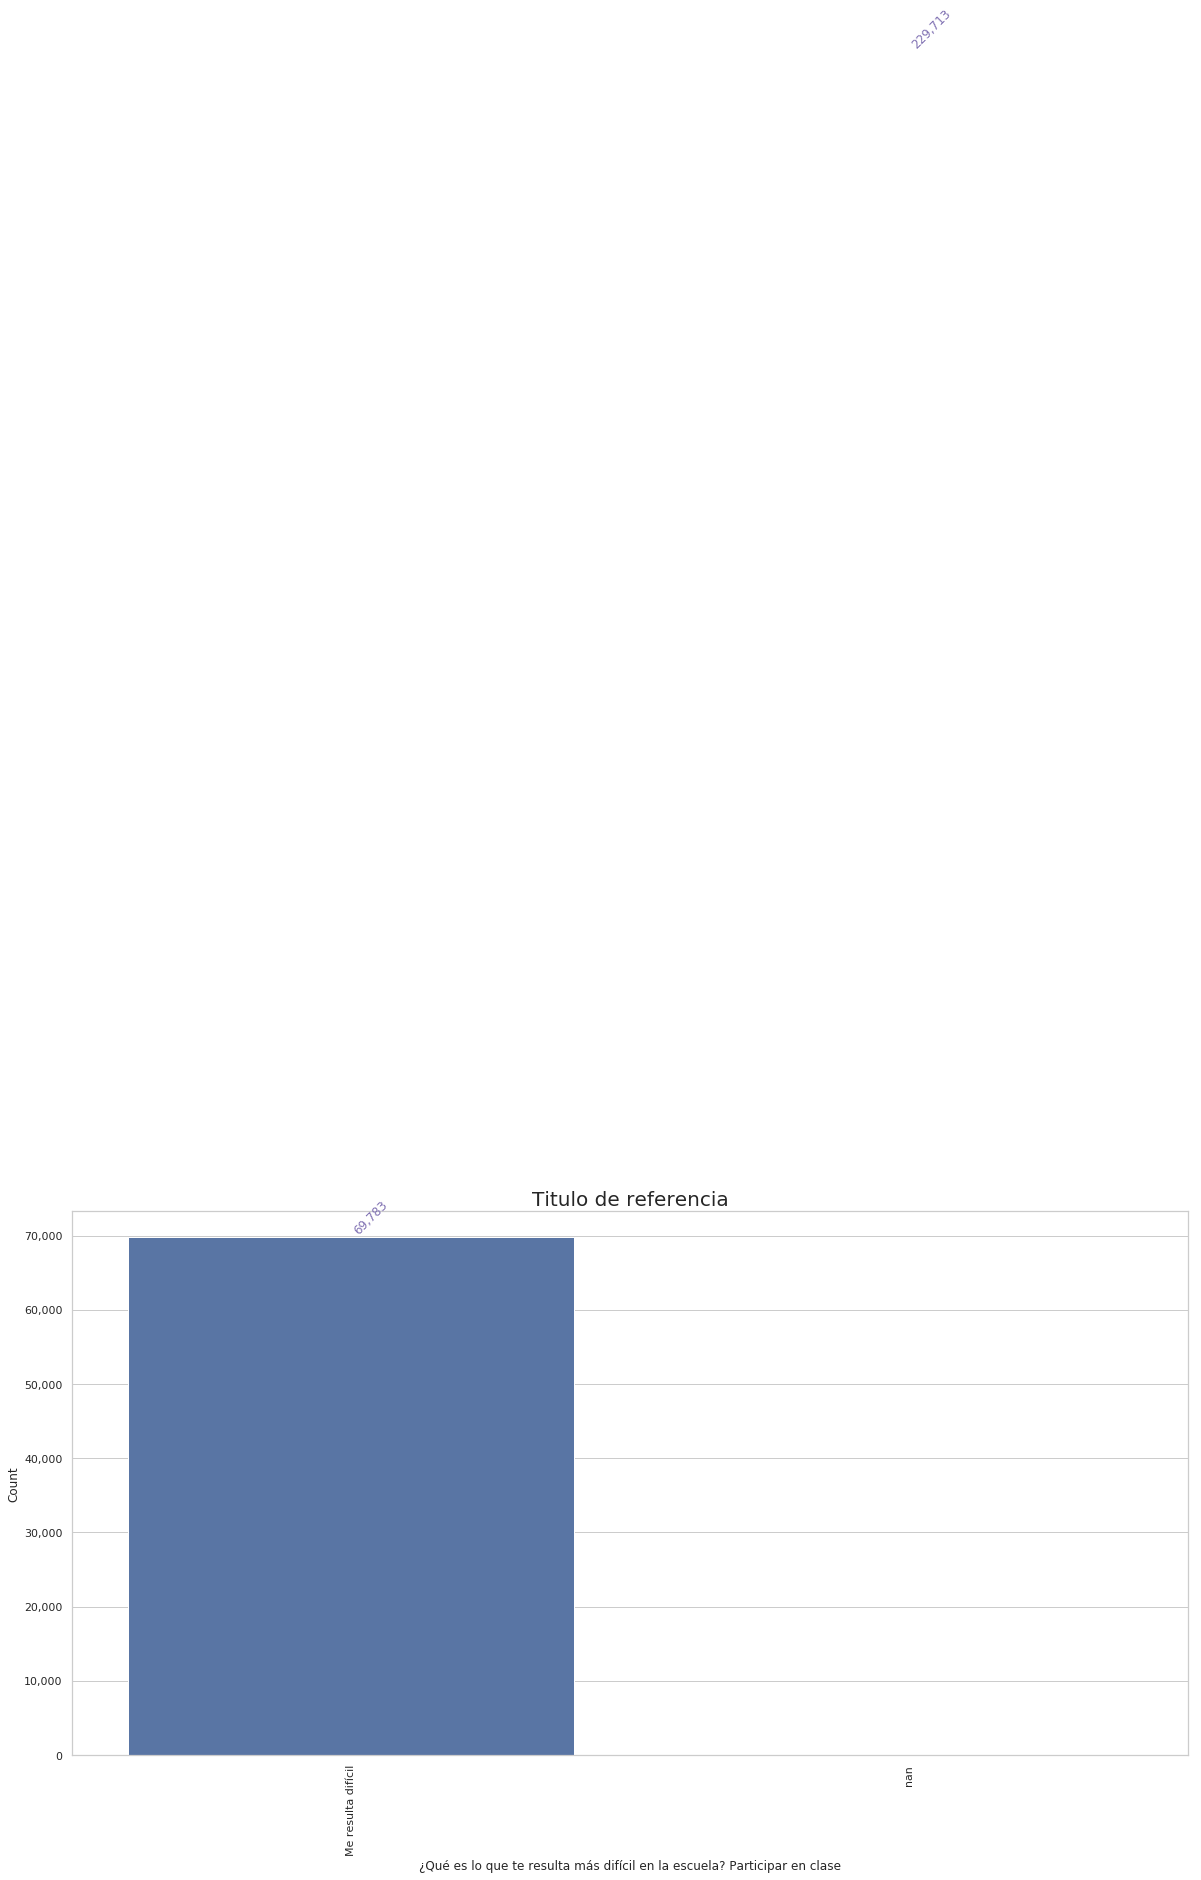

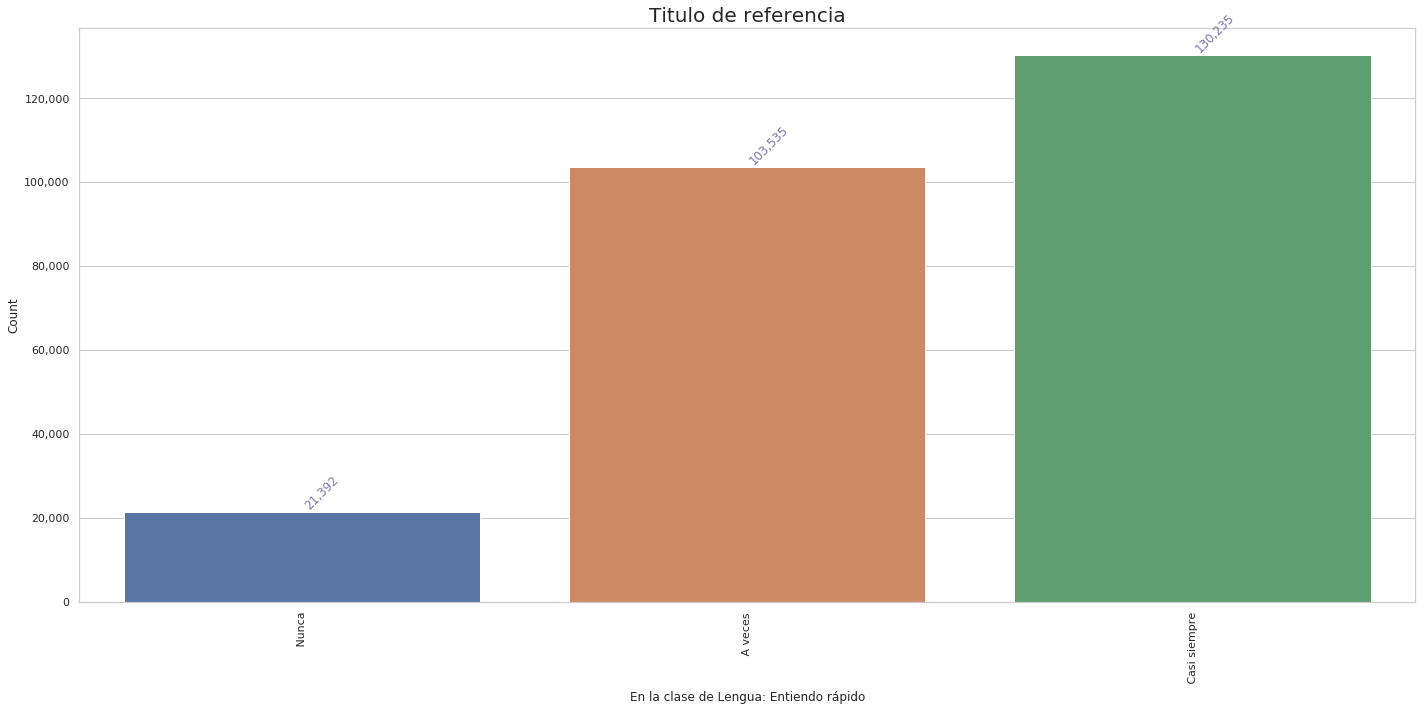

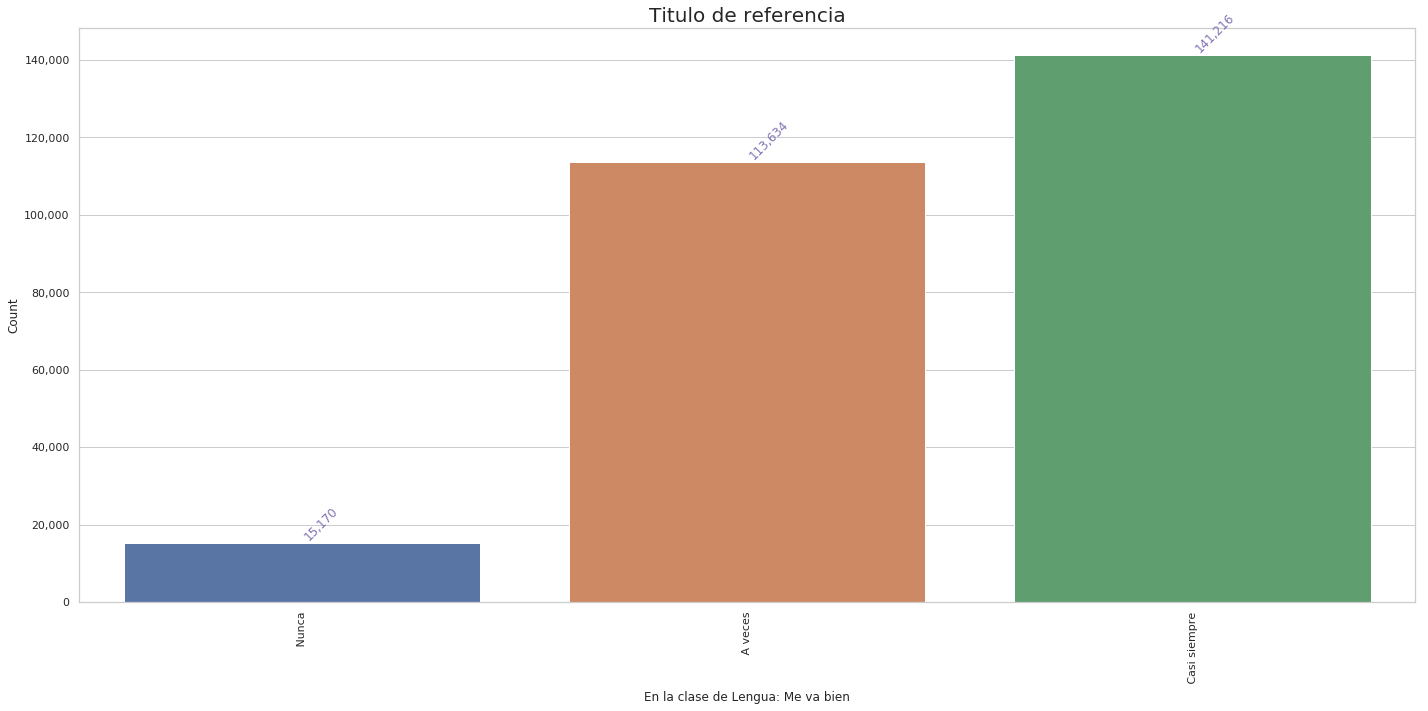

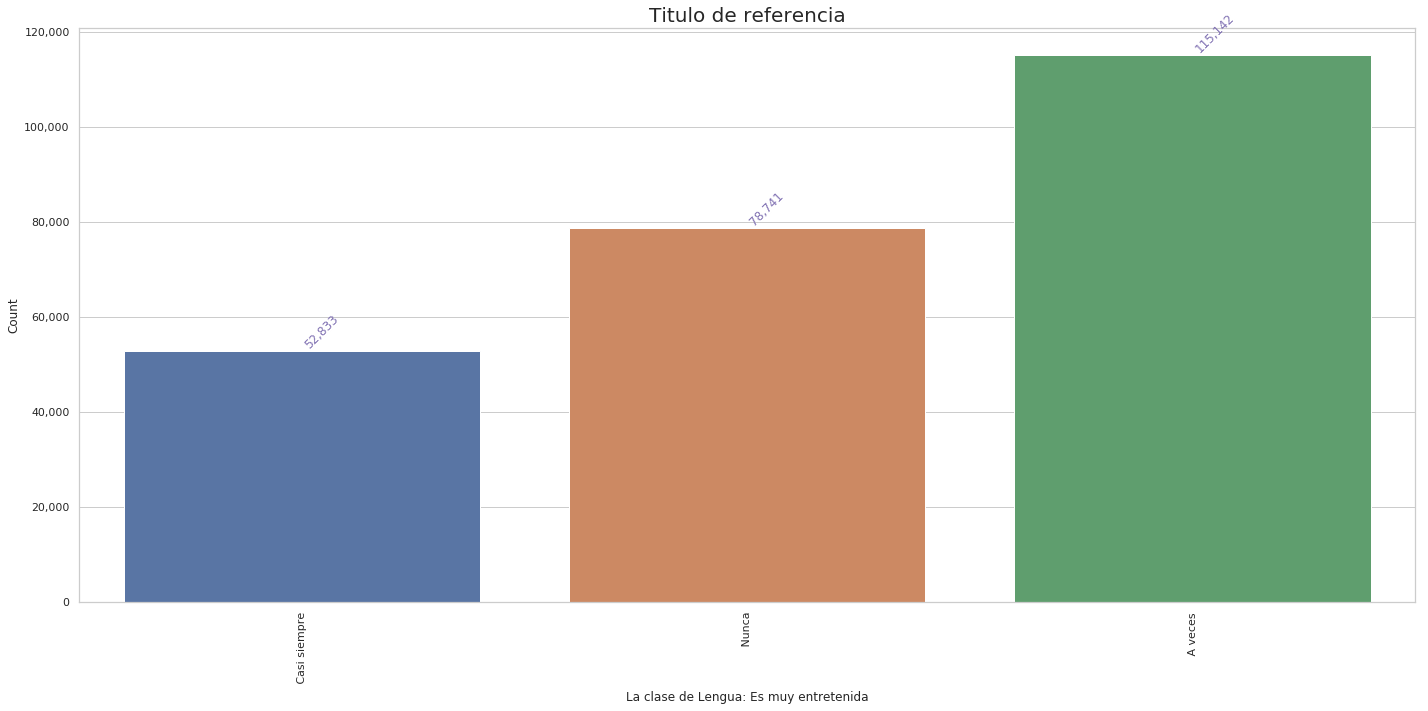

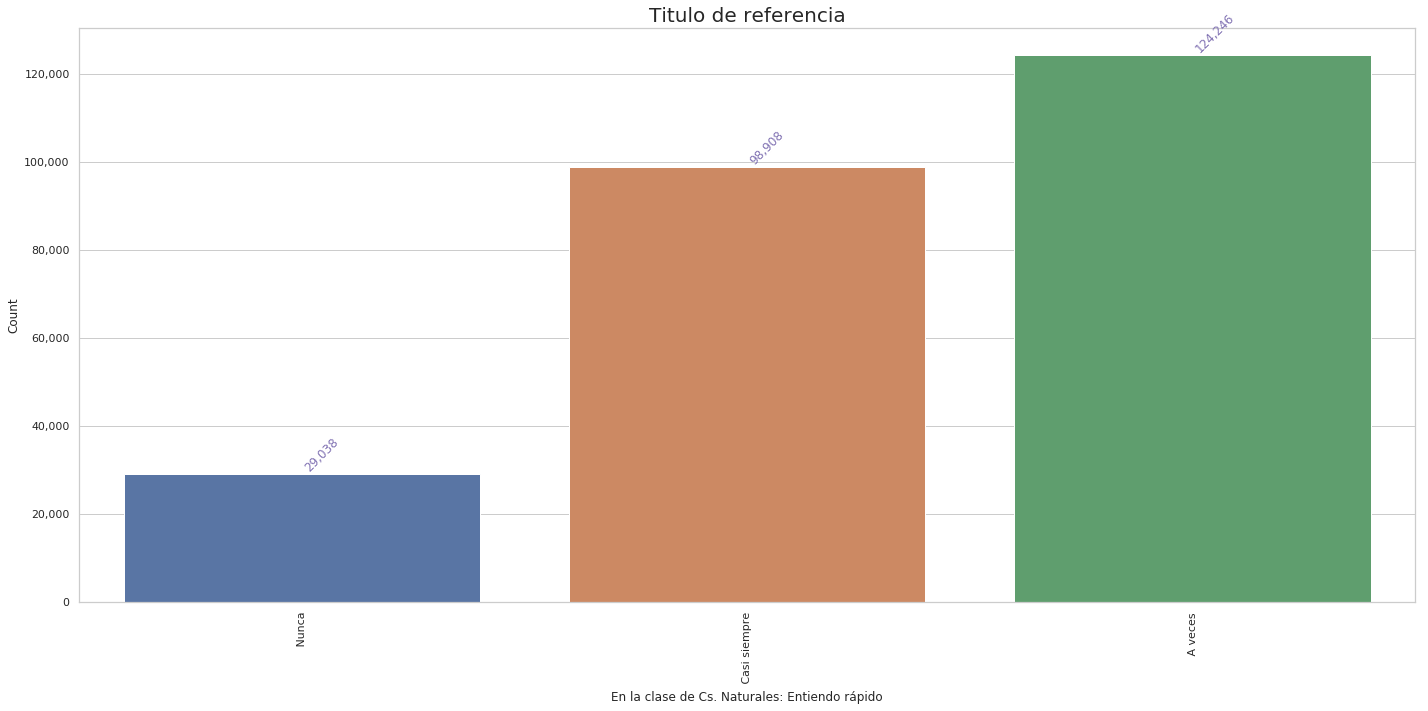

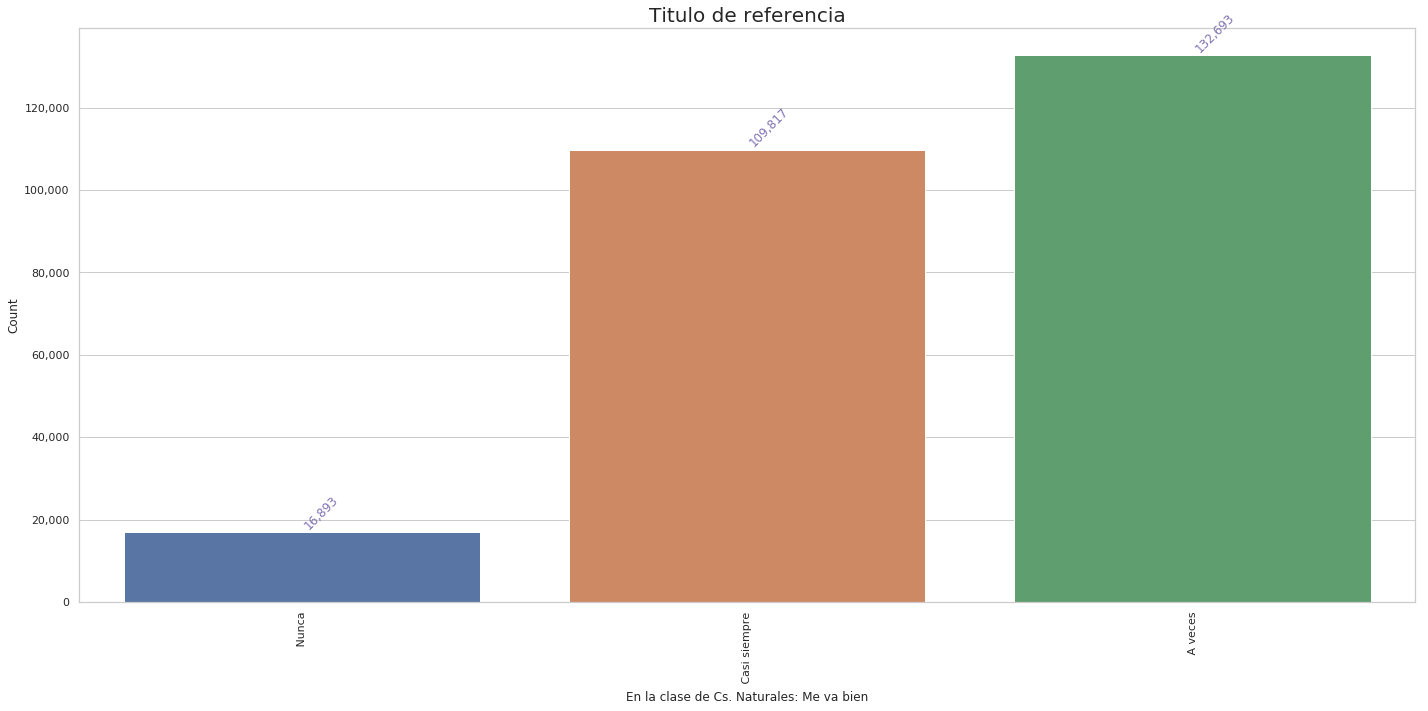

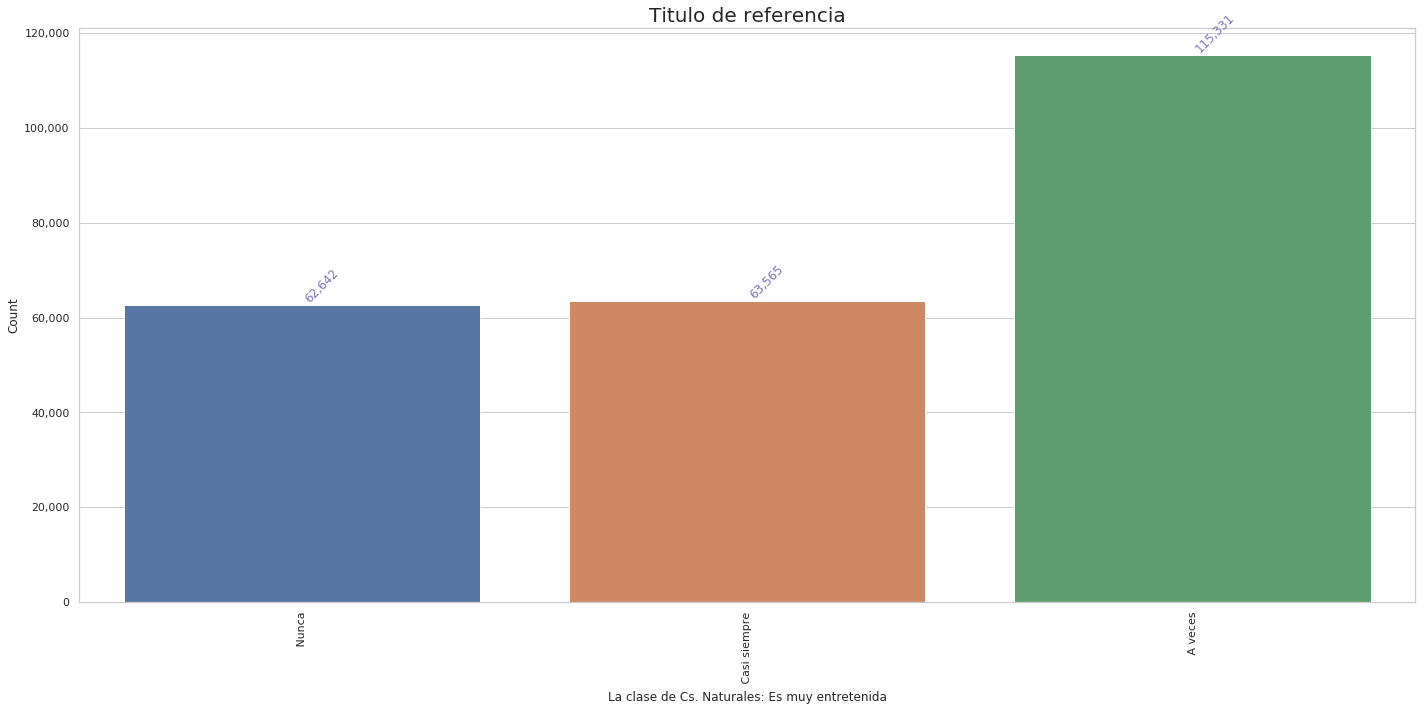

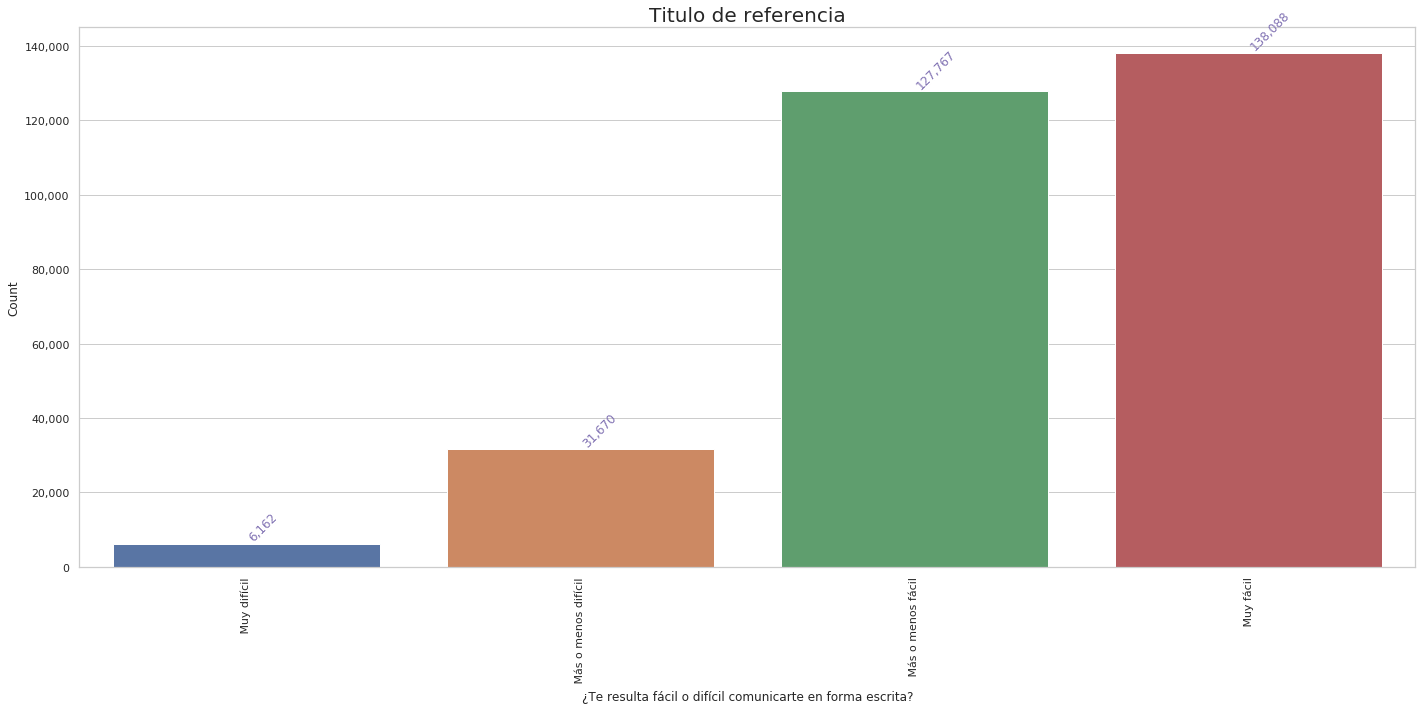

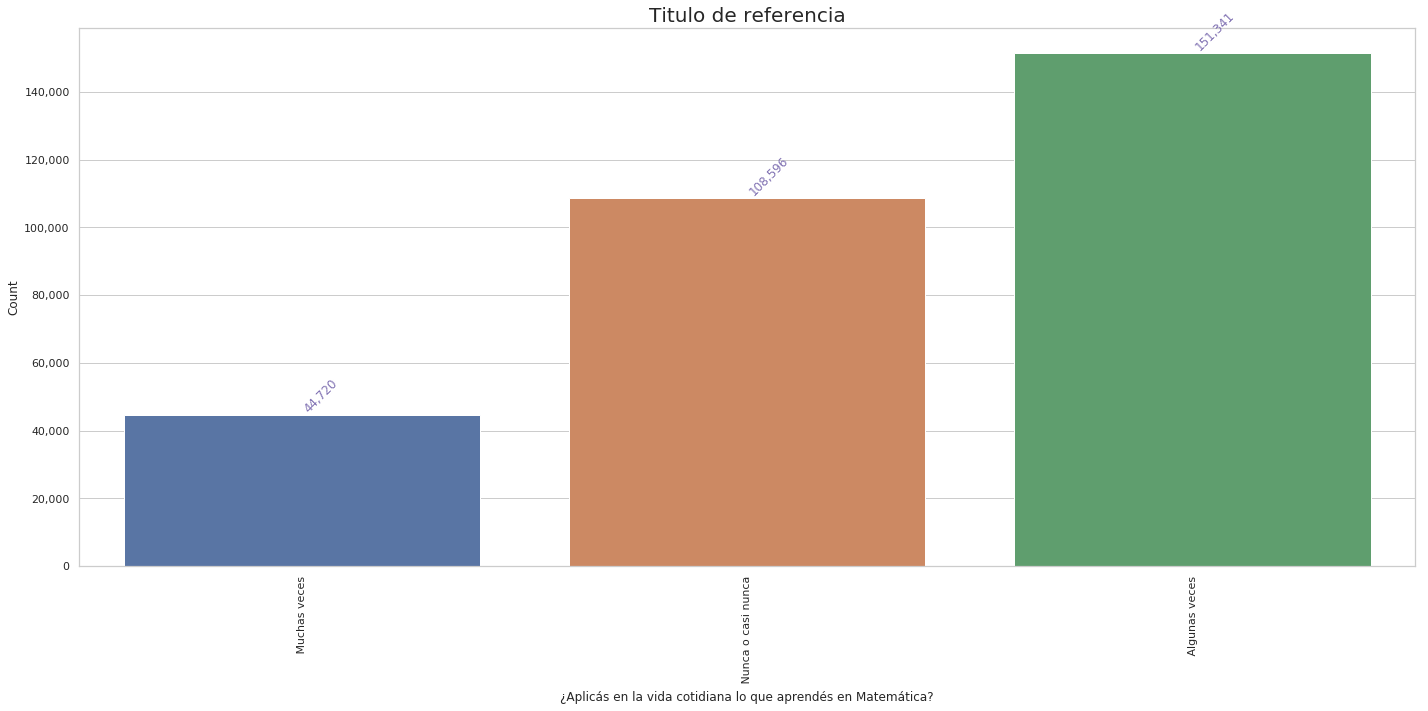

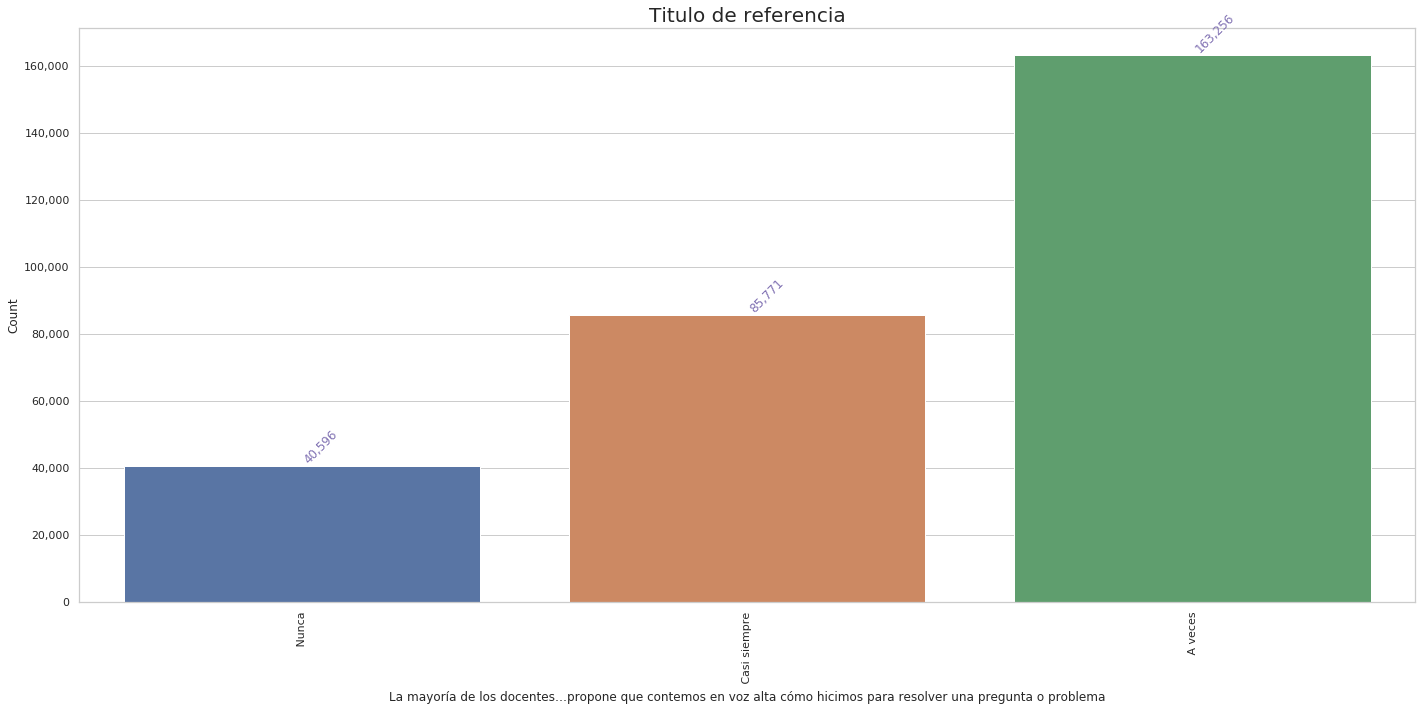

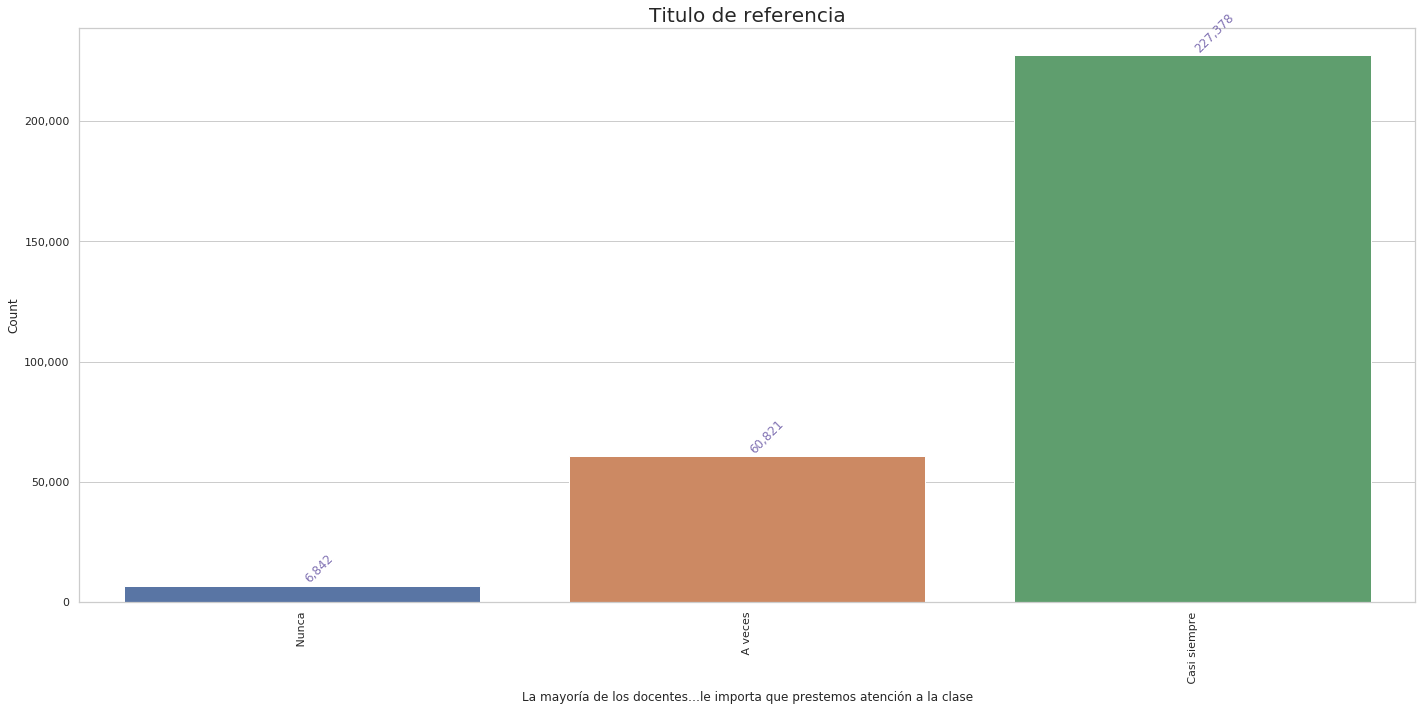

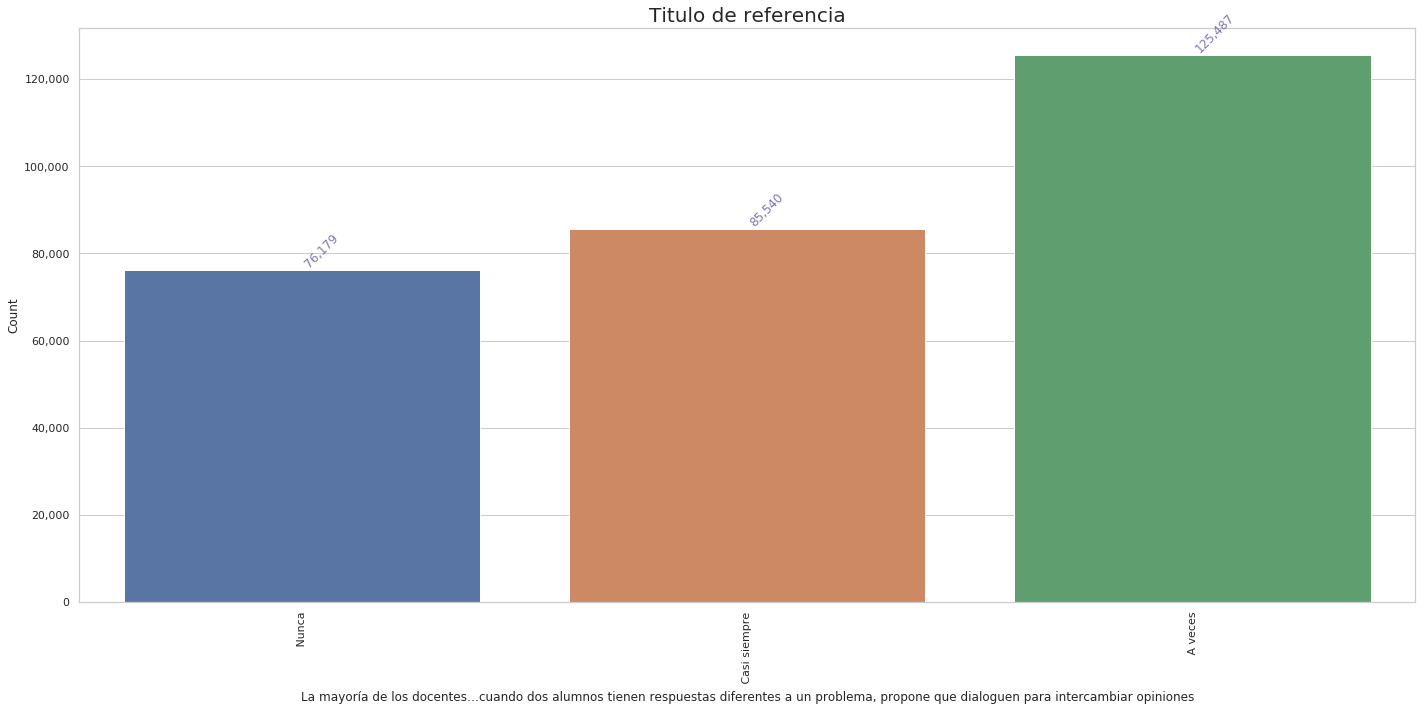

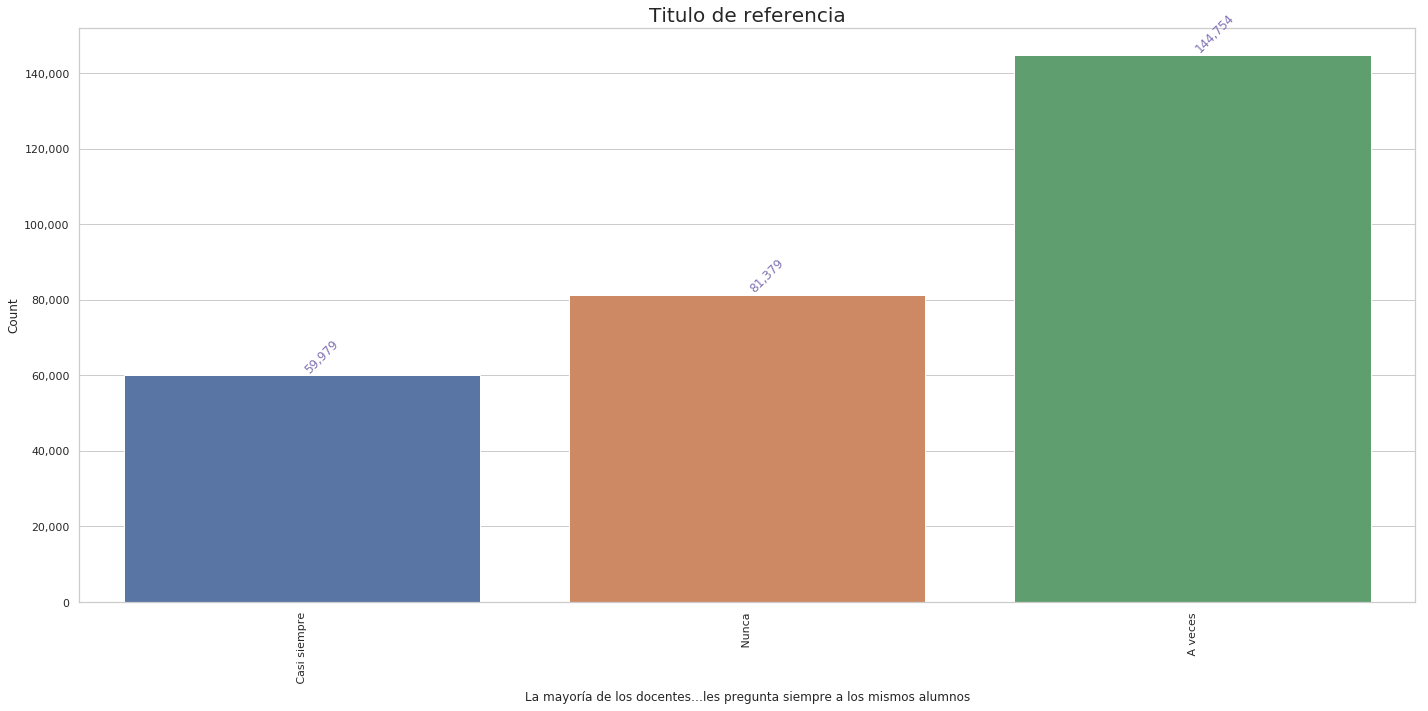

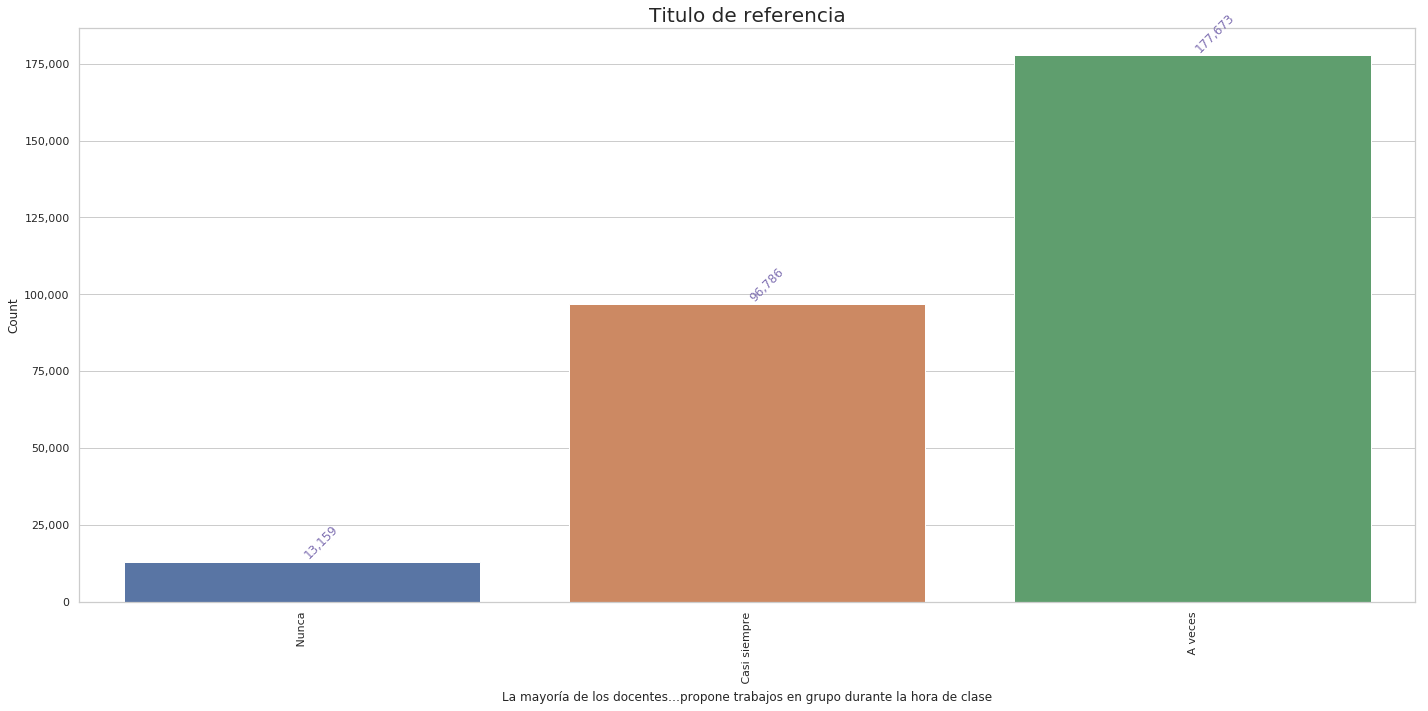

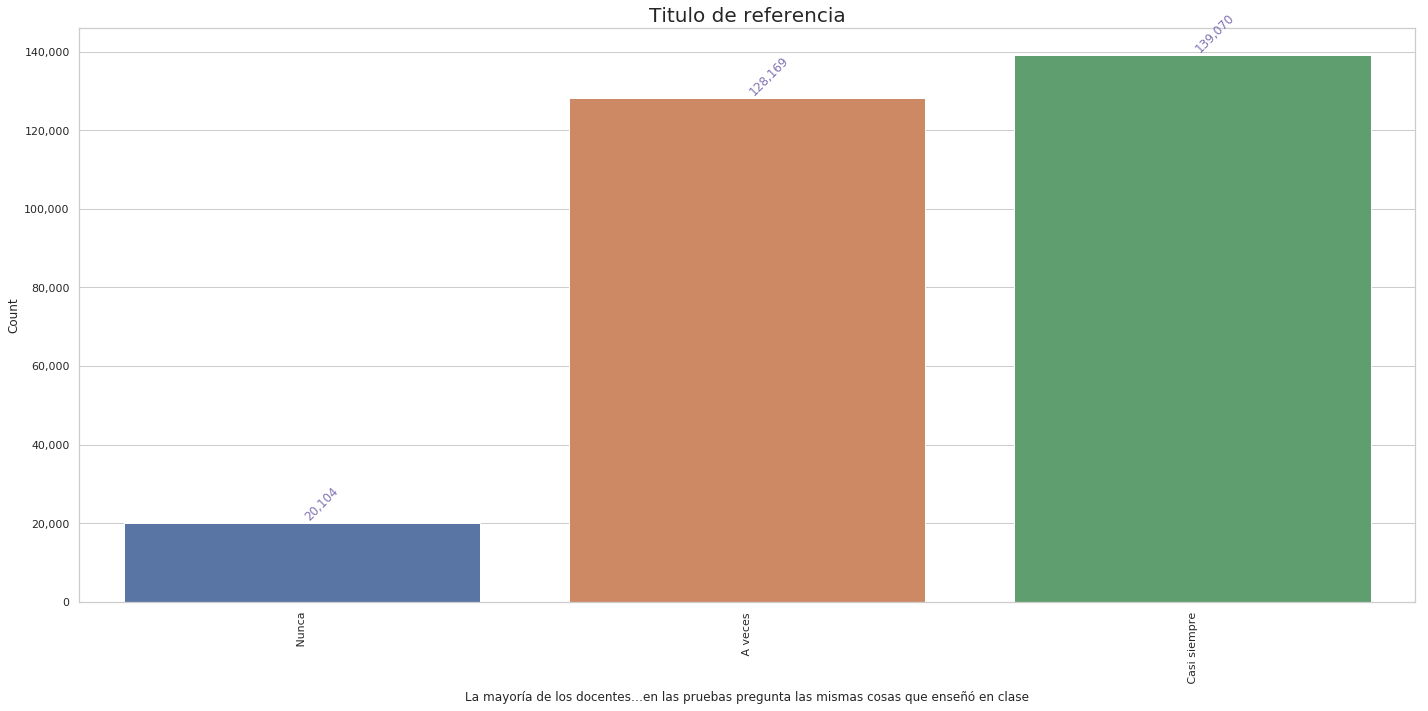

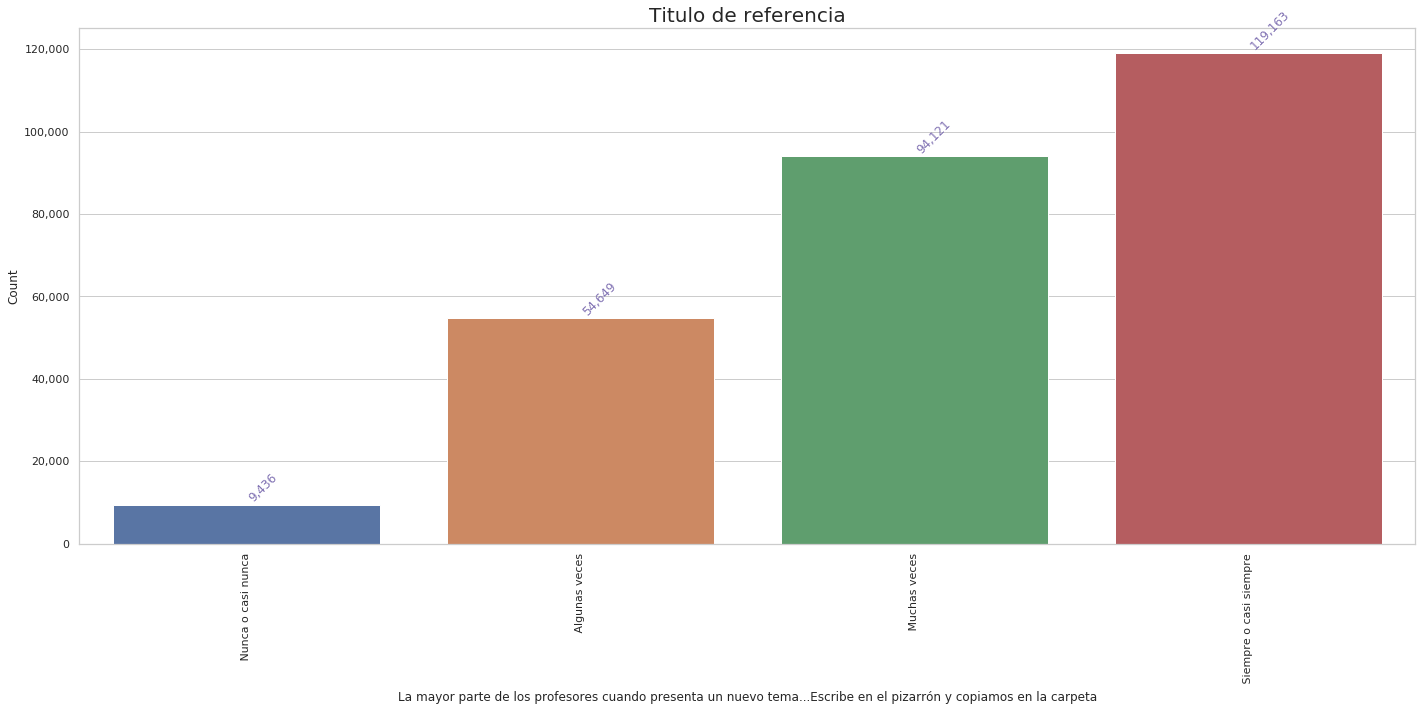

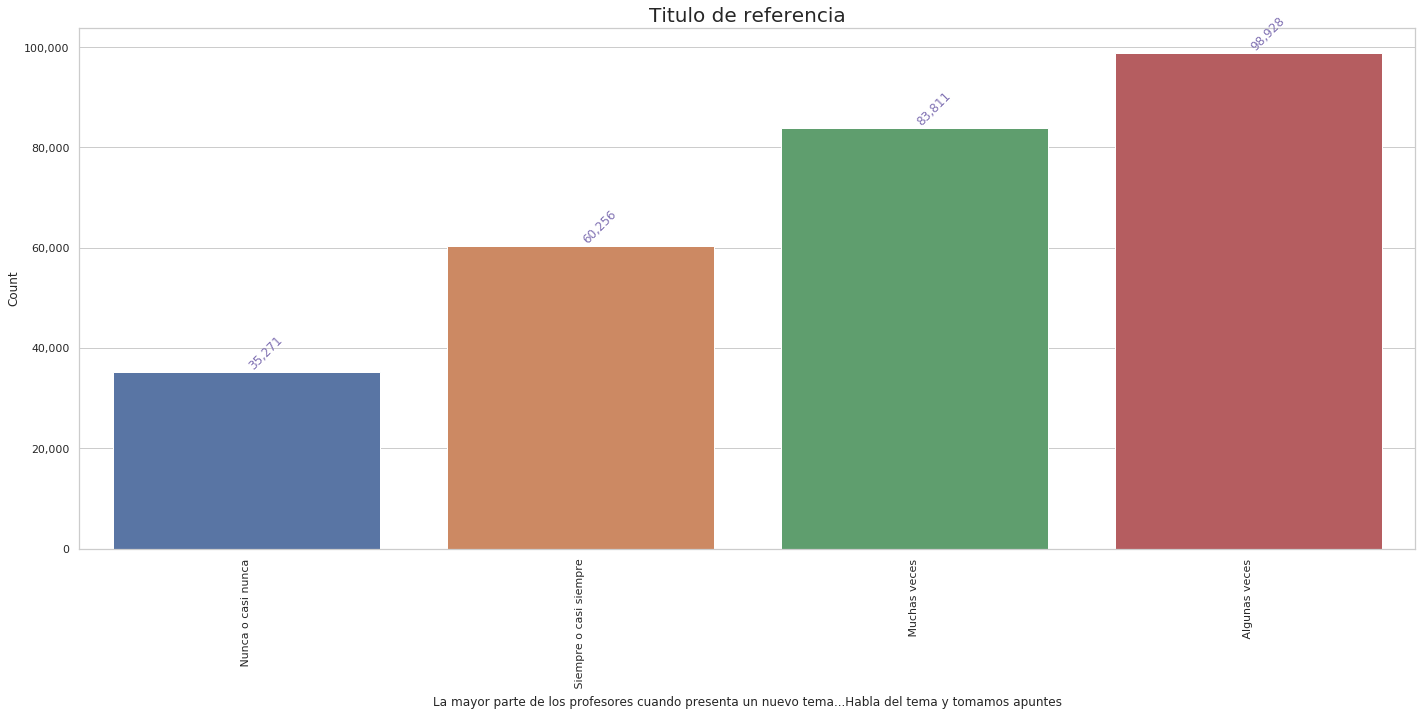

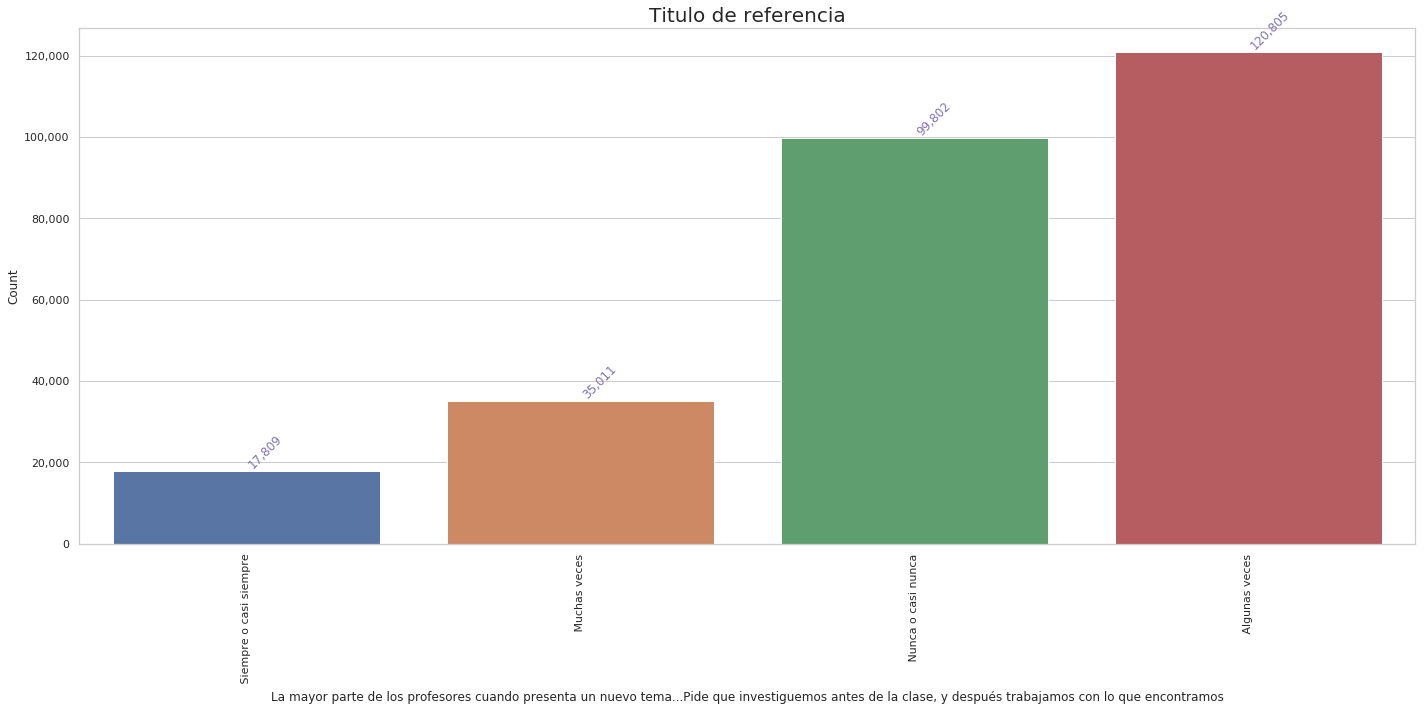

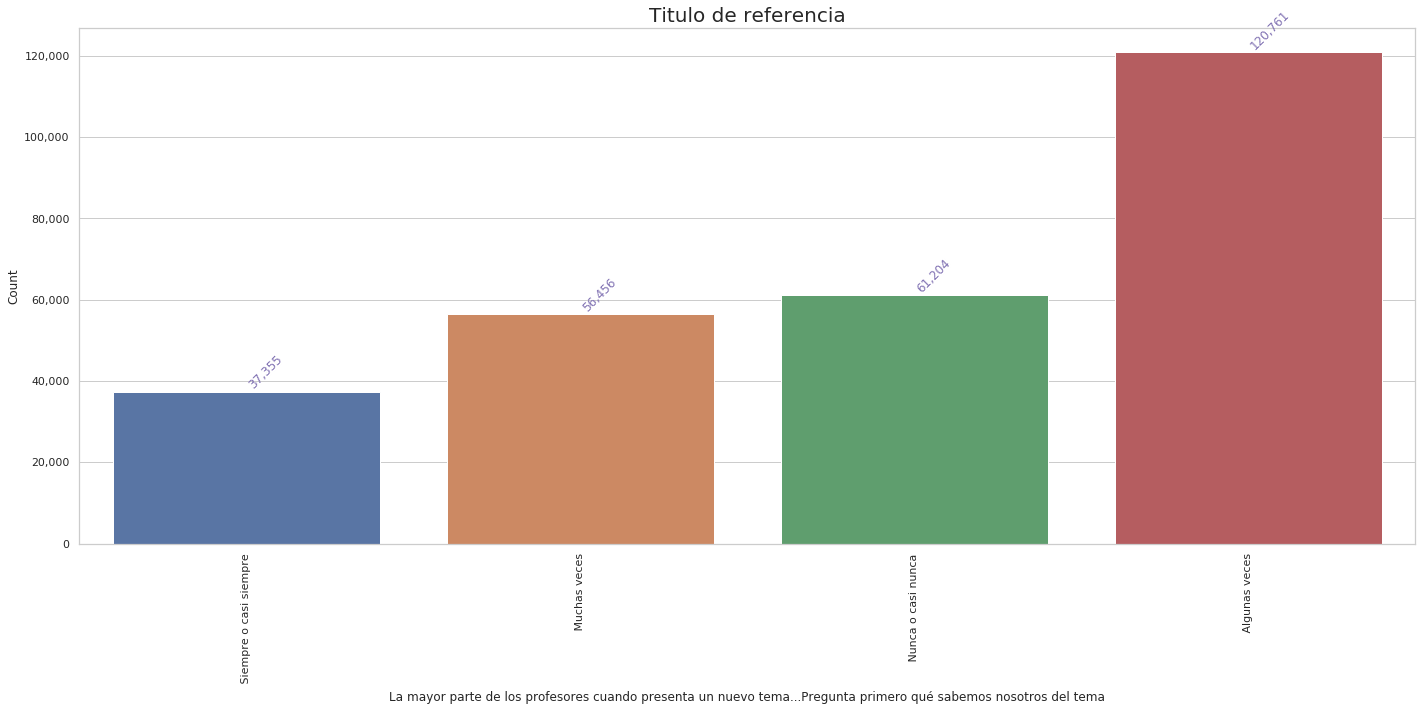

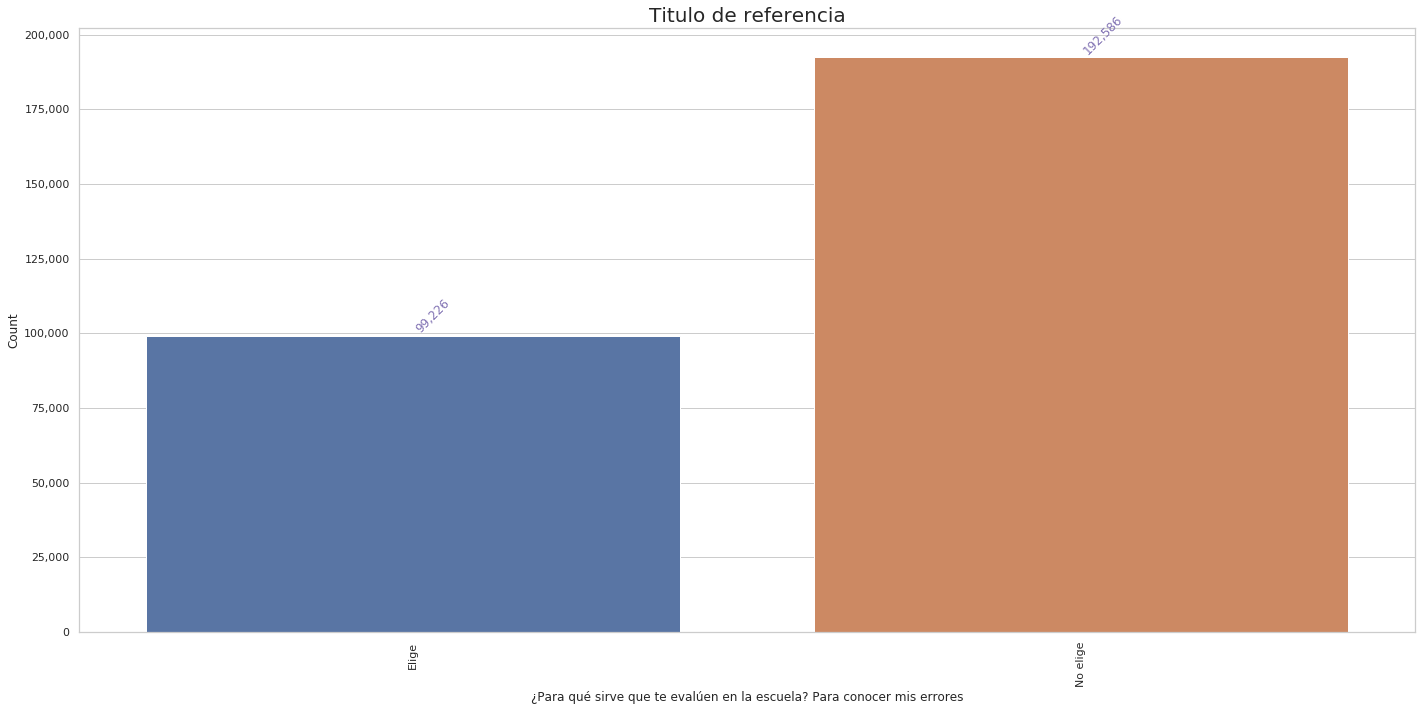

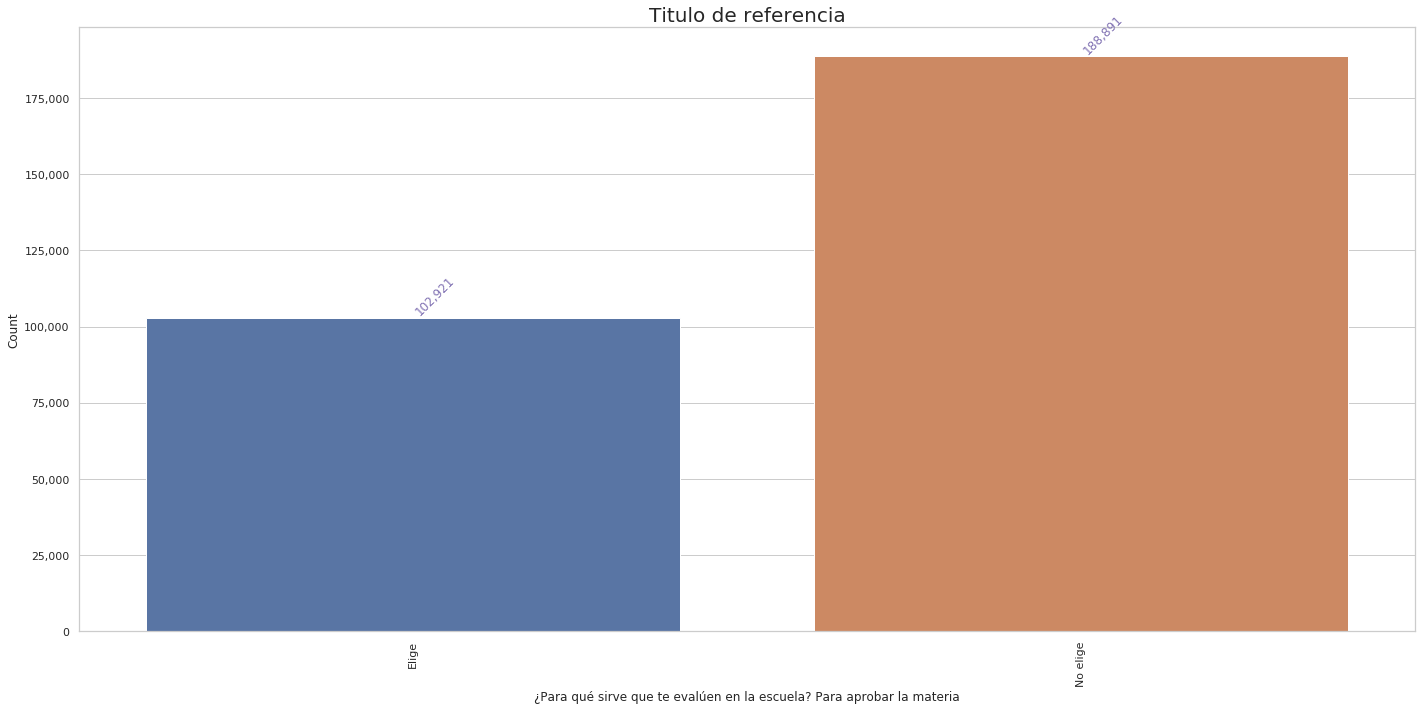

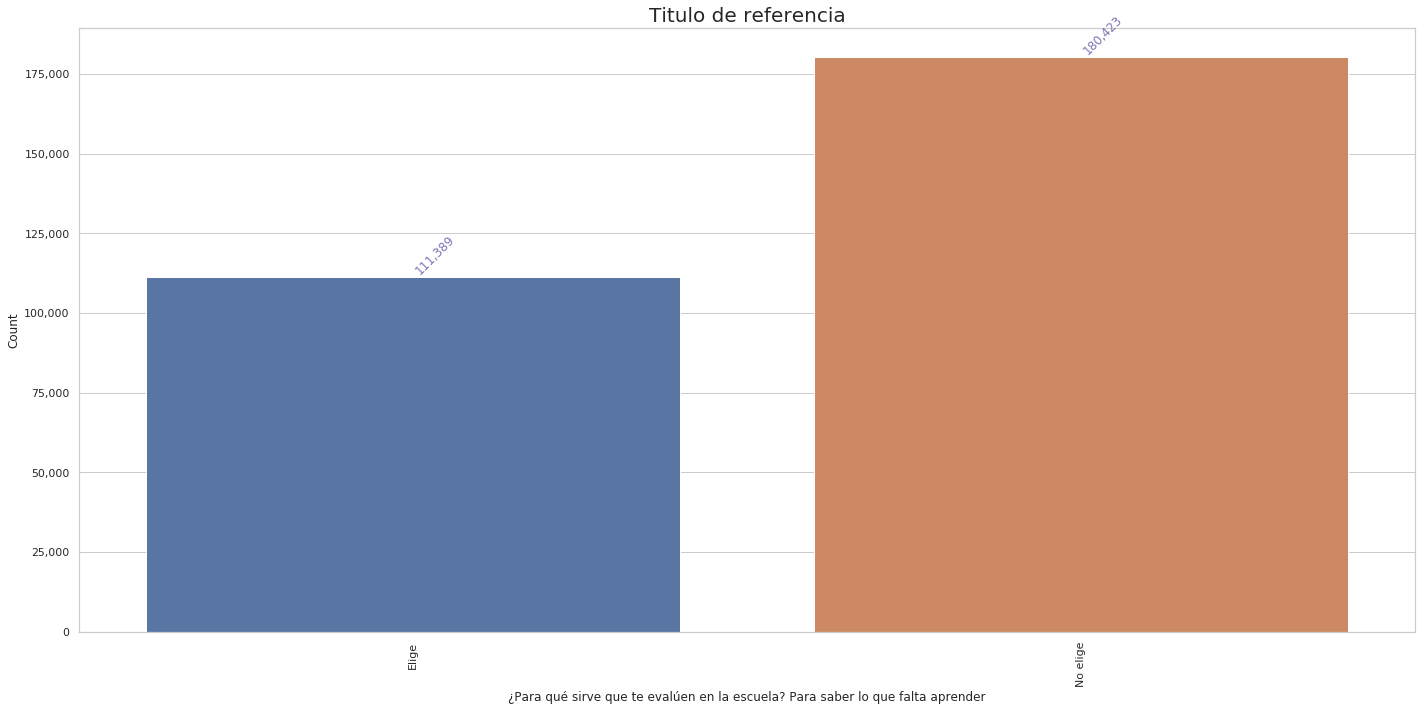

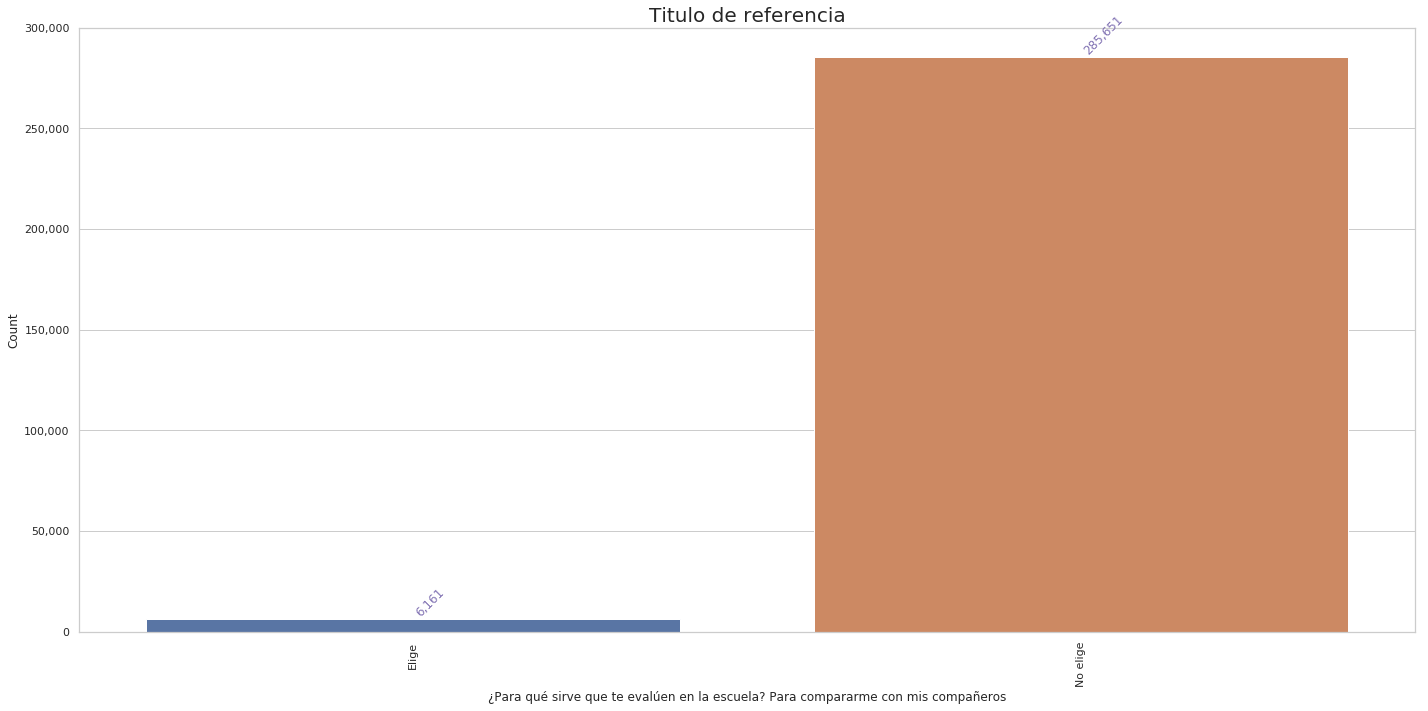

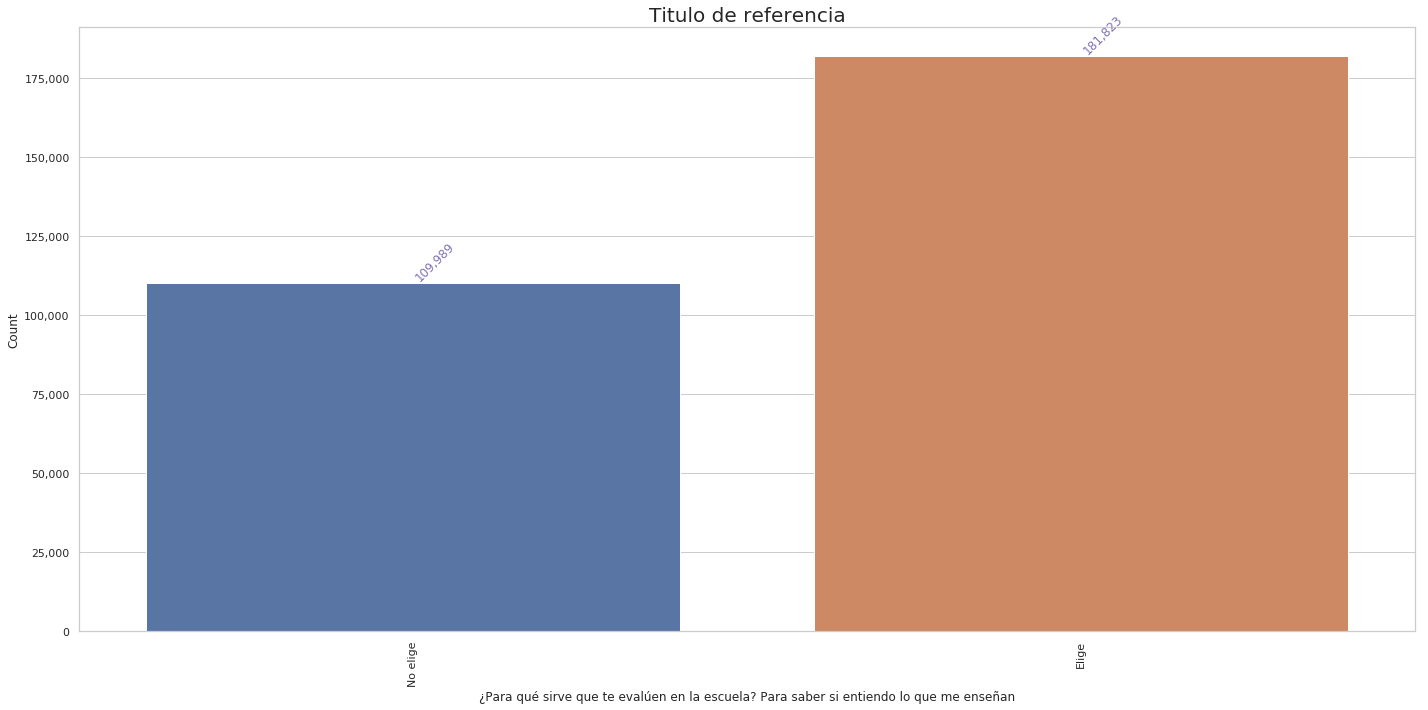

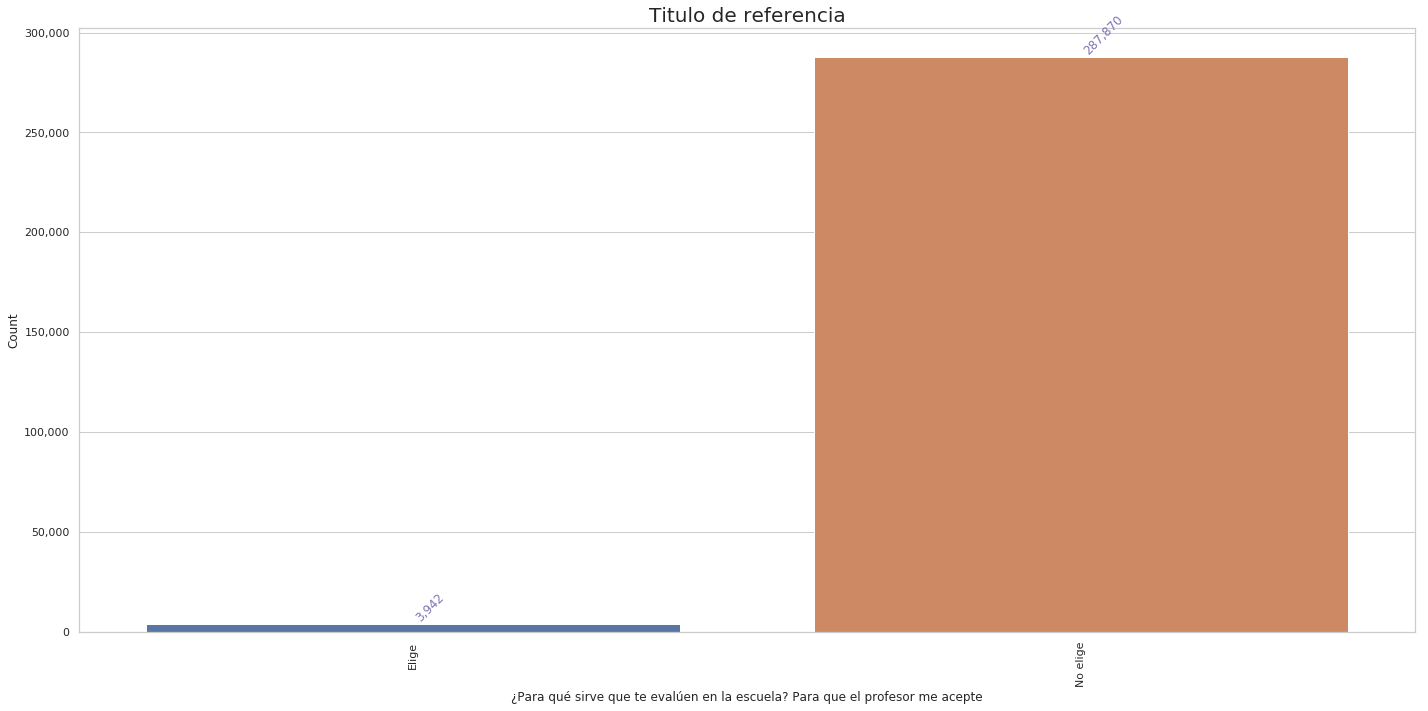

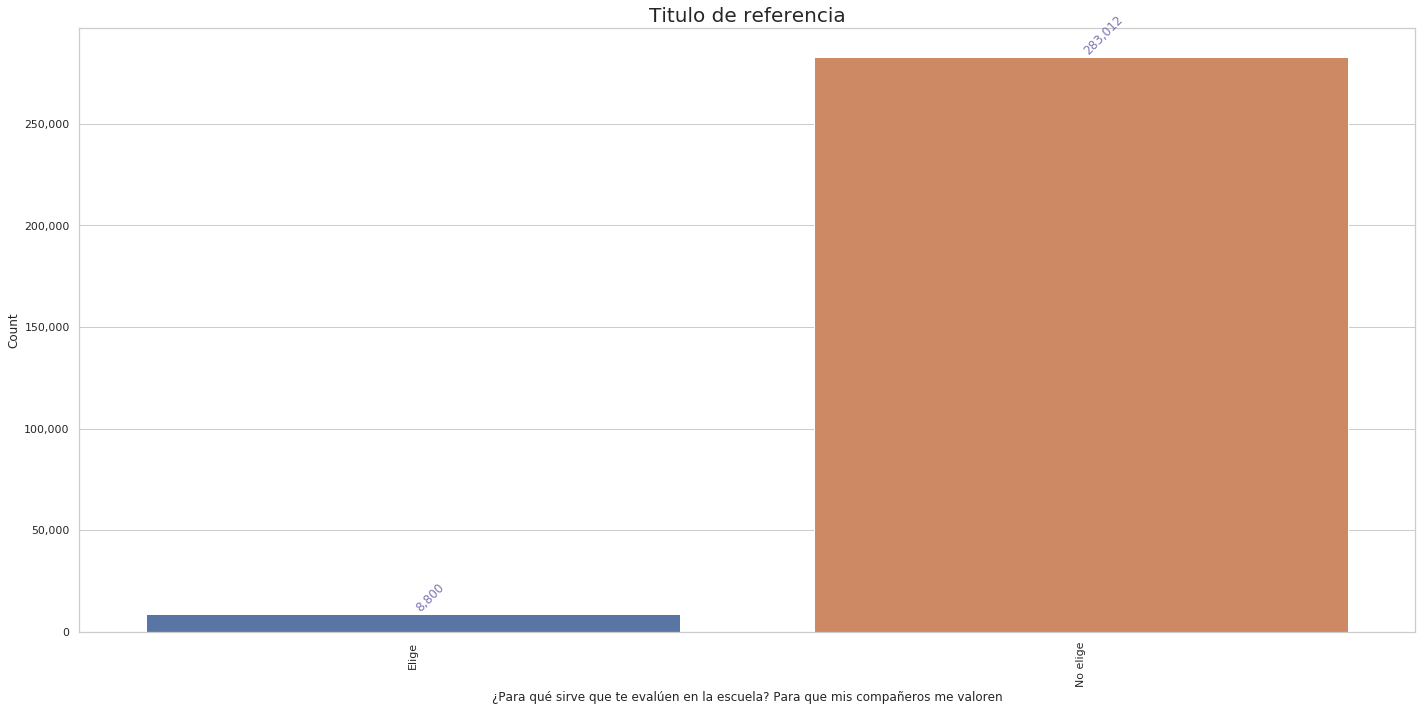

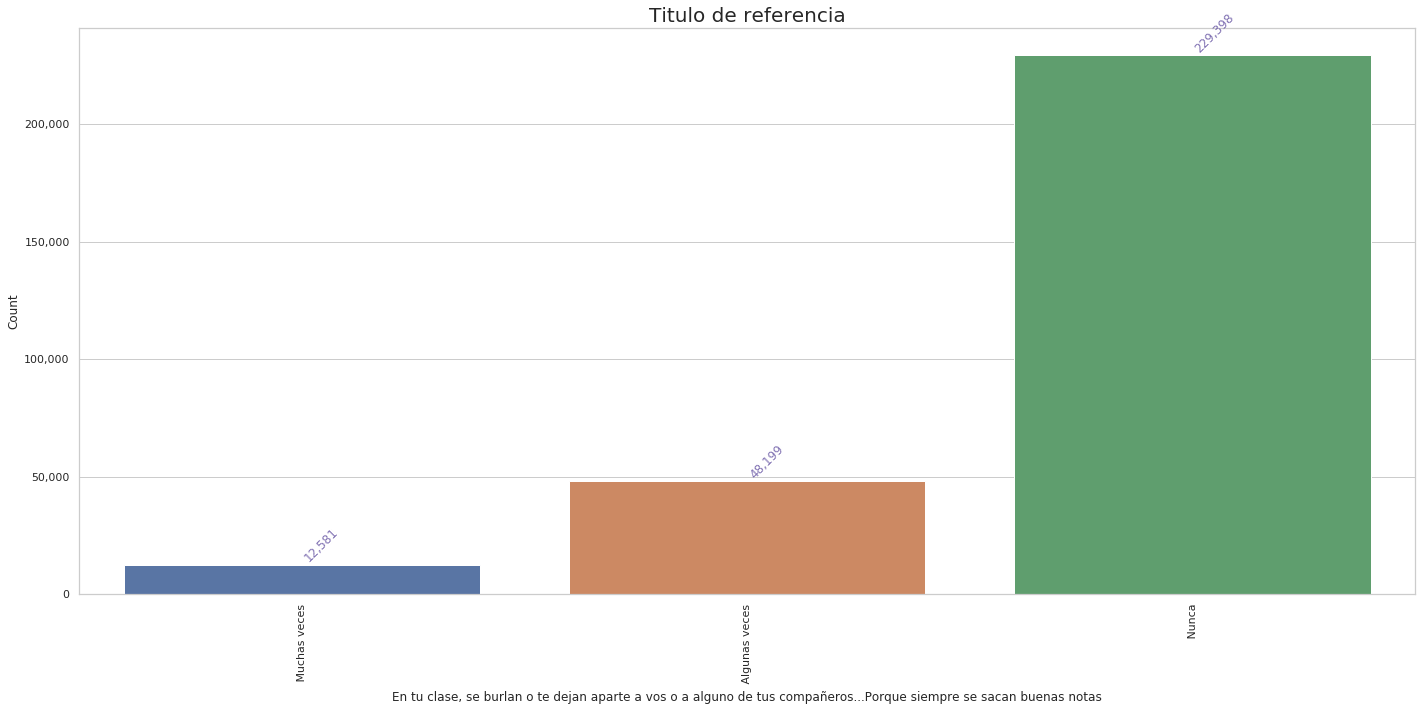

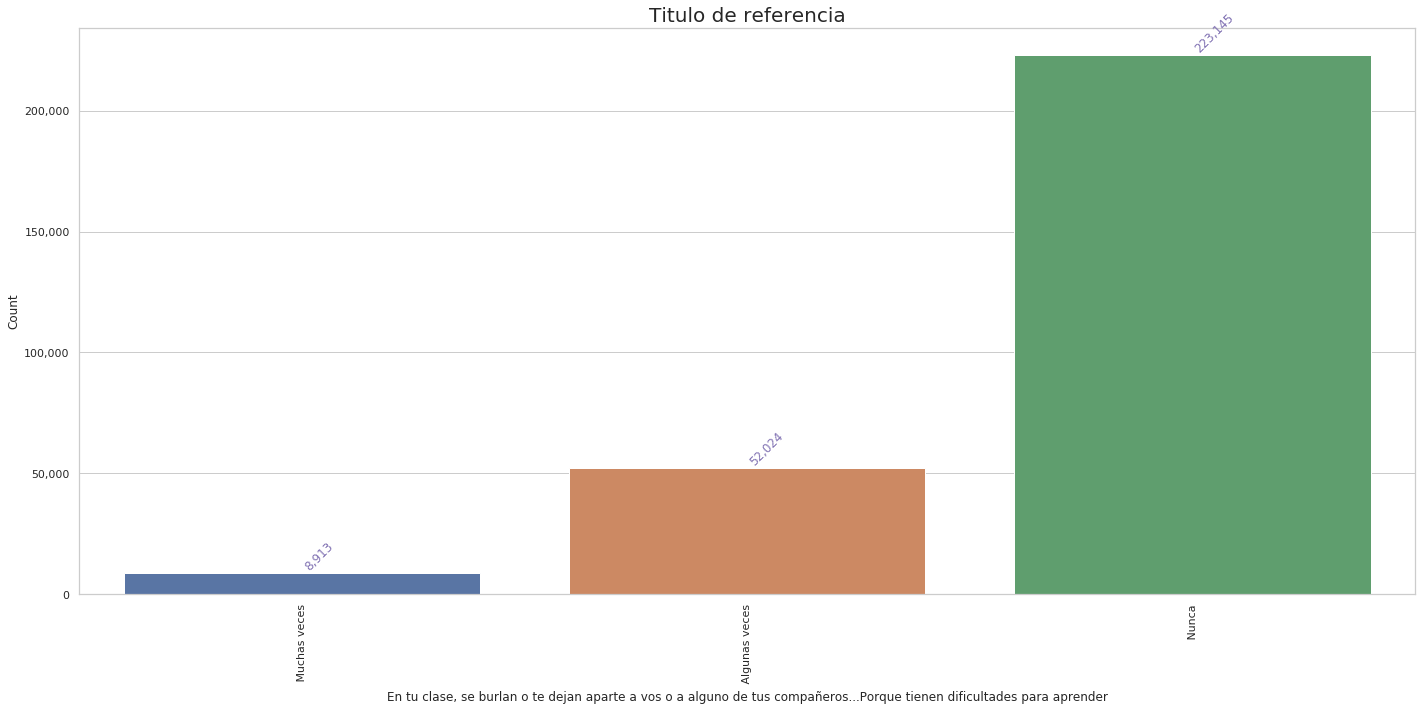

/opt/conda/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


ValueError: Image size of 1202x468311772 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x720 with 1 Axes>

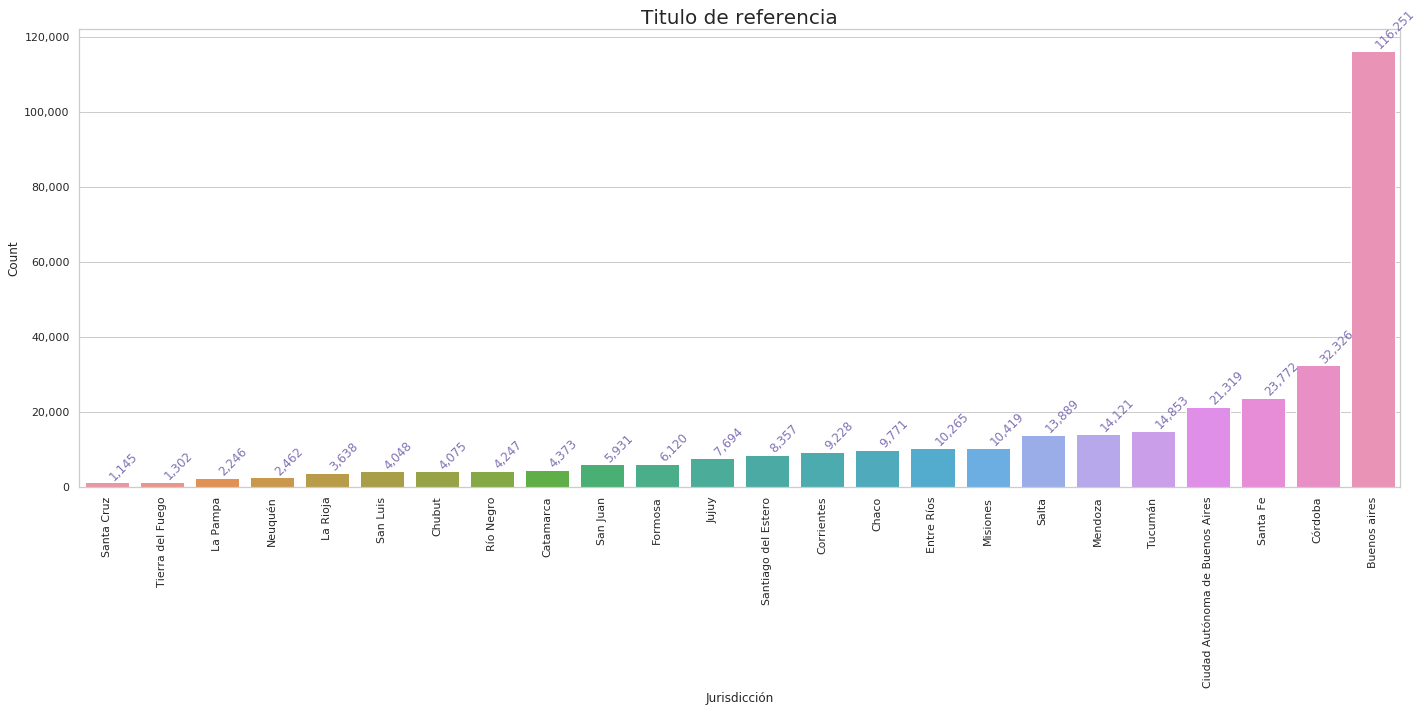

/opt/conda/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


ValueError: Image size of 1202x143589841 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x720 with 1 Axes>

In [ ]:
for plot in variables_explicitas.Variable.unique():
    plot_multiple_vars(df = Estudiante_5_6_año_Secundaria_2016, x ='index',y= plot,label = dict_2016)

In [16]:
Estudiante_5_6_año_Secundaria_2016.head()

,sector,ambito,cod_provincia,Municipio,Ap1,Ap2,Ap3a,Ap3b,Ap3c,Ap4,Ap5,Ap6,Ap7,Ap8,Ap9,Ap10a,Ap10b,Ap10c,Ap10d,Ap10e,Ap11,Ap12,Ap13,Ap14,Ap15,Ap16,Ap17,Ap18,Ap19,Ap20,Ap21a,Ap21b,Ap21c,Ap22a,Ap22b,Ap22c,Ap22d,Ap22e,Ap22f,Ap22g,Ap22h,Ap23a,Ap23b,Ap23c,Ap23d,Ap23e,Ap23f,Ap23g,Ap23h,Ap23i,Ap24a,Ap24b,Ap24c,Ap25a,Ap25b,Ap25c,Ap26a,Ap26b,Ap26c,Ap27a,Ap27b,Ap27c,Ap28,Ap29,Ap30,Ap31a,Ap31b,Ap31c,Ap31d,Ap31e,Ap31f,Ap32a,Ap32b,Ap32c,Ap32d,Ap32e,Ap32f,Ap32g,Ap33,Ap34a,Ap34b,Ap34c,Ap34d,Ap34e,Ap34f,Ap34g,Ap34h,Ap35,Ap36a,Ap36b,Ap36c,Ap36d,Ap36e,Ap36f,Ap36g,Ap37a,Ap37b,Ap37c,Ap37d,Ap38a,Ap38b,Ap38c,Ap38d,Ap38e,Ap39a,Ap39b,Ap39c,Ap39d,Ap39e,Ap40a,Ap40b,Ap40c,Ap40d,Ap40e,Ap40f,Ap40g,Ap40h,Ap40i,Ap40j,Ap41,Ap42,Ap43a,Ap43b,Ap43c,Ap43d,Ap43e,Ap43f,Ap43g,Ap43h,Ap43i,Ap43j,Ap43k,Ap43l,Ap44a,Ap44b,Ap44c,Ap44d,Ap45,Ap46a,Ap46b,Ap46c,Ap46d,Ap46e,Ap46f,Ap46g,Ap46h,Ap46i,Ap46j,Ap47a,Ap47b,Ap48a,Ap48b,Ap48c,Ap48d,Ap48e,Ap48f,Ap48g,Ap48h,Ap48i,Ap48j,Ap48k,Ap49a,Ap49b,Ap49c,Ap50a,Ap50b,Ap50c,Ap50d,ponder,lpondera,lpuntaje,ldesemp,mpondera,mpuntaje,mdesemp,cspondera,cspuntaje,csdesemp,cnpondera,cnpuntaje,cndesemp,iclima,iclimal,iclimam,autoconlengua,autoconmate,autoconlengual,autoconlenguam,qvulneraa,qvulneraap,isocioa,isocioal,isocioam,iclimacs,iclimacn,isocioacn,isocioacs
0,3.0,3.0,6,NaN,5.0,1.0,1.0,1.0,1.0,7.0,4.0,1.0,1.0,5.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,3.0,3.0,3.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,4.0,4.0,4.0,4.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,4.0,4.0,2.0,4.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,NaN,3.0,1.0,3.0,4.0,4.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,3.0,6,NaN,3.0,1.0,1.0,1.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,4.0,3.0,4.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,4.0,4.0,1.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,1.0,4.0,4.0,4.0,2.0,1.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,6,NaN,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,7.0,7.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,3.0,4.0,3.0,4.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,2.0,4.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,3.0,6,NaN,2.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,4.0,7.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,3

In [15]:
variables_explicitas.loc[variables_explicitas.Variable == 'sector']

,Variable,Etiqueta,Códigos,Etiqueta.1
891,sector,Sector de gestión,1.0,Estatal
892,sector,Sector de gestión,2.0,Privada
893,sector,Sector de gestión,3.0,Sin datos


In [20]:
secundario_2016_sector_provincia = Estudiante_5_6_año_Secundaria_2016[['sector','cod_provincia']].copy()

secundario_2016_sector_provincia['sector'] = secundario_2016_sector_provincia['sector']\
                                .map(variables_explicitas.loc[variables_explicitas.Variable == 'sector']\
                                .set_index('Códigos')['Etiqueta.1'])

secundario_2016_sector_provincia['cod_provincia'] = secundario_2016_sector_provincia['cod_provincia']\
                                .map(variables_explicitas.loc[variables_explicitas.Variable == 'cod_provincia']\
                                .set_index('Códigos')['Etiqueta.1'])

secundario_2016_sector_provincia['count'] = 1

groupby_secundario_2016_sector_provincia = secundario_2016_sector_provincia\
                                            .groupby(['sector','cod_provincia']).count().reset_index()

In [28]:
groupby_secundario_2016_sector_provincia.groupby('cod_provincia').sum()['count']

cod_provincia
Buenos aires                       116251
Catamarca                            4373
Chaco                                9771
Chubut                               4075
Ciudad Autónoma de Buenos Aires     21319
Corrientes                           9228
Córdoba                             32326
Entre Ríos                          10265
Formosa                              6120
Jujuy                                7694
La Pampa                             2246
La Rioja                             3638
Mendoza                             14121
Misiones                            10419
Neuquén                              2462
Río Negro                            4247
Salta                               13889
San Juan                             5931
San Luis                             4048
Santa Cruz                           1145
Santa Fe                            23772
Santiago del Estero                  8357
Tierra del Fuego                     1302
Tucumán             

In [31]:
groupby_secundario_2016_sector_provincia

,sector,cod_provincia,count
0,Estatal,Buenos aires,57217
1,Estatal,Catamarca,3425
2,Estatal,Chaco,8058
3,Estatal,Chubut,3405
4,Estatal,Ciudad Autónoma de Buenos Aires,6683
5,Estatal,Corrientes,7241
6,Estatal,Córdoba,16874
7,Estatal,Entre Ríos,6823
8,Estatal,Formosa,5295
9,Estatal,Jujuy,6370


In [35]:
data = (groupby_secundario_2016_sector_provincia.set_index(['cod_provincia',
                                                     'sector'])['count'] / groupby_secundario_2016_sector_provincia.groupby('cod_provincia').sum()['count'])\
.to_frame().reset_index()

In [51]:
list(data.columns)

['Estatal', 'Privada', 'Sin datos']

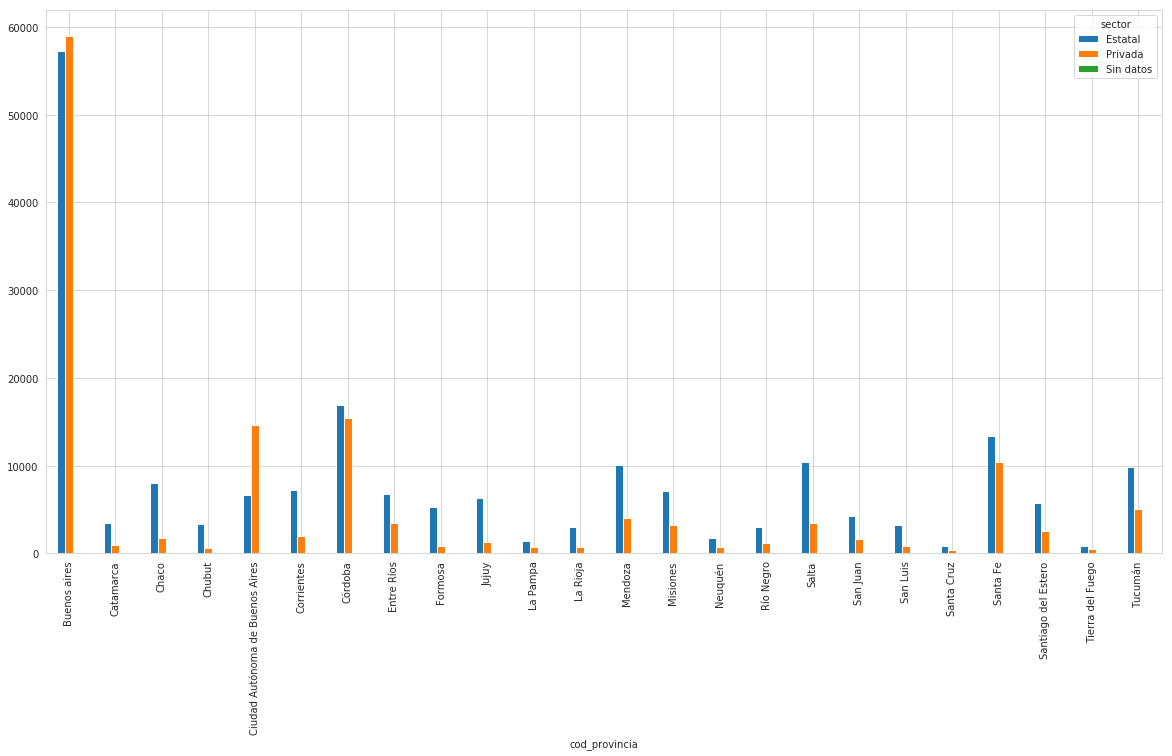

In [58]:
data= groupby_secundario_2016_sector_provincia.pivot(index='cod_provincia',columns='sector',values='count')
data.plot(kind='bar',figsize=(20,10))

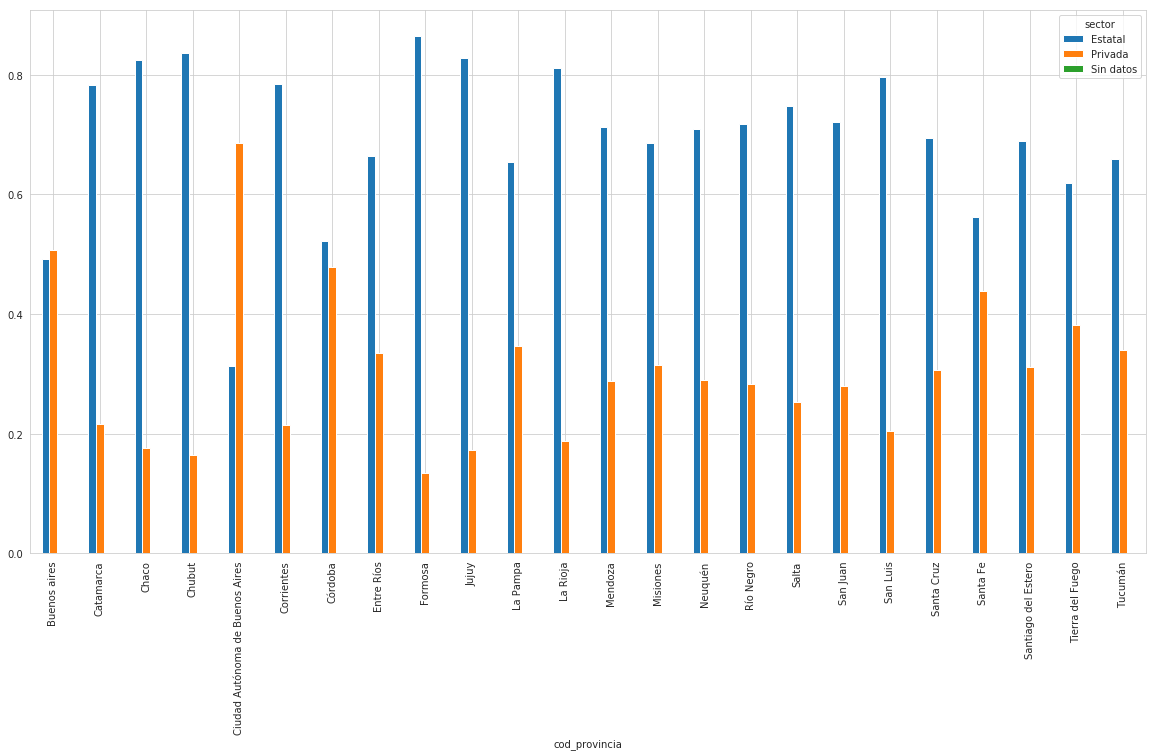

In [36]:
data= data.pivot(index='cod_provincia',columns='sector',values='count')
data.plot(kind='bar',figsize=(20,10))